##### Predicting Social Media - Linear regression, Lasso regression, Ridge regression and SGDRegressor: <br/>
[Dataset download](https://archive.ics.uci.edu/ml/datasets/Facebook+metrics)<br/>
    
1) Linear Regression, Lasso Regression, Ridge Regression, SGDRegression. <br/>
2) A dicussion about normalization, standarization of the data, in normal linear regression vs. more complex models.<br/>
3) Diferences between LASSO and RIDGE regression, which is more efficient, which is better in helping interpretation vs. predictions.<br>
4) Types of score methods: R2_score, mean_square_error, root_mean_square_error.<br/>
5) Split data between training set and testing set.<br/>
6) Polynomial Features in different degree.<br/>
7) Cross validation method, using different regressions methods inclusive: GridSearchCV, LassoCV, RidgeCV, ElasticNetCV.<br/>
8) Exploratory data analysis finding outliers, testing normality of a distribution using D'Agostino K^2 Test.<br/>
9) Feature Engineering (One hot Encode) based on categorical unordered data vs. non-categorical data, in addition of how to better handle 'NaN' data, boxcox for data normalization as well.<br/>
10) Correlation matrix, heatmap of correlation matrix.<br/>

(Moro et al., 2016) Moro, S., Rita, P., & Vala, B. (2016). Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach. Journal of Business Research, 69(9), 3341-3351. [Paper](https://www.sciencedirect.com/science/article/abs/pii/S0148296316000813?via%3Dihub)

## <span style='color:green'> Objectives </span>

The main objective of this exercise is to better understand tools, such as linear regression, Ridge regression, Lasso regression and Stochastic gradient regression. To put data normalization into practice using Log, normalization using StandardScaler and MinMaxScaler. To learn more about polynomial features, normalization, standardization and their impact on data applied to different models.<br/>

For example, the impact of Standarization in Ridge vs. Lasso Regression. I also had the chance to explore the SGDRegressor by understanding the concept of gradient descent and why each step of the descent process has to be of a correct length in order not to escape the minimum value of an area. I also applied univariate and multivariate analyzes that helped me find good outliers and relationship between the variables.

## <span style='color:green'> Data set description </span>

In [13]:
data_raw.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

OBS: Most part of the data is made of numerical features, but Type which is a categorical feature

## <span style='color:green'> Data exploration, data cleaning and feature engineering.</span>

1) Check missing values;<br/>
2) Check categorical features;<br/>
3) Check D'Agostino K^2 Test for normality of the data;<br/>
4) Apply normalization if data is too skewed;<br/>
5) Check the presence of outliers;<br/>
6) Check for univariate analysis (mean, median, mode, .describe)<br/>
7) Check for multivariate analysis (covariance, correlation, correlation between the Total Interactions)<br/>

In [14]:
import warnings
warnings.filterwarnings('ignore')   # to avoid warnings

import pandas as pd
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## <span style='color:blue'> Importing the data </span>

In [15]:
data_raw = pd.read_csv('./Facebook_metrics/dataset_Facebook.csv', sep=';')

In [16]:
data_raw.T

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
Page total likes,139441,139441,139441,139441,139441,139441,139441,139441,139441,139441,...,85979,85979,85979,85093,85093,85093,81370,81370,81370,81370
Type,Photo,Status,Photo,Photo,Photo,Status,Photo,Photo,Status,Photo,...,Photo,Photo,Link,Photo,Photo,Photo,Photo,Photo,Photo,Photo
Category,2,2,3,2,2,2,3,3,2,3,...,3,3,1,3,3,3,2,1,3,2
Post Month,12,12,12,12,12,12,12,12,12,12,...,1,1,1,1,1,1,1,1,1,1
Post Weekday,4,3,3,2,2,1,1,7,7,6,...,6,6,5,1,7,7,5,5,4,4
Post Hour,3,10,3,10,3,9,3,9,3,10,...,11,3,11,2,10,2,8,2,11,4
Paid,0,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,NaN
Lifetime Post Total Reach,2752,10460,2413,50128,7244,10472,11692,13720,11844,4694,...,5280,6184,45920,8412,5400,4684,3480,3778,4156,4188
Lifetime Post Total Impressions,5091,19057,4373,87991,13594,20849,19479,24137,22538,8668,...,8703,10228,5808,13960,9218,7536,6229,7216,7564,7292
Lifetime Engaged Users,178,1457,177,2211,671,1191,481,537,1530,280,...,951,956,753,1179,810,733,537,625,626,564


In [17]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [18]:
data_raw.dtypes.value_counts()

int64      15
float64     3
object      1
dtype: int64

In [19]:
data_raw.isna().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [20]:
print('Paid:  ',data_raw['Paid'].nunique())
print('like:  ',data_raw['like'].nunique())
print('Share: ',data_raw['share'].nunique())

Paid:   2
like:   257
Share:  88


In [21]:
data_raw['Total Interactions']

0       100
1       164
2        80
3      1777
4       393
       ... 
495      84
496      75
497     115
498     136
499     119
Name: Total Interactions, Length: 500, dtype: int64

## <span style='color:blue'> Univariate and multivariate statistical analysis </span>

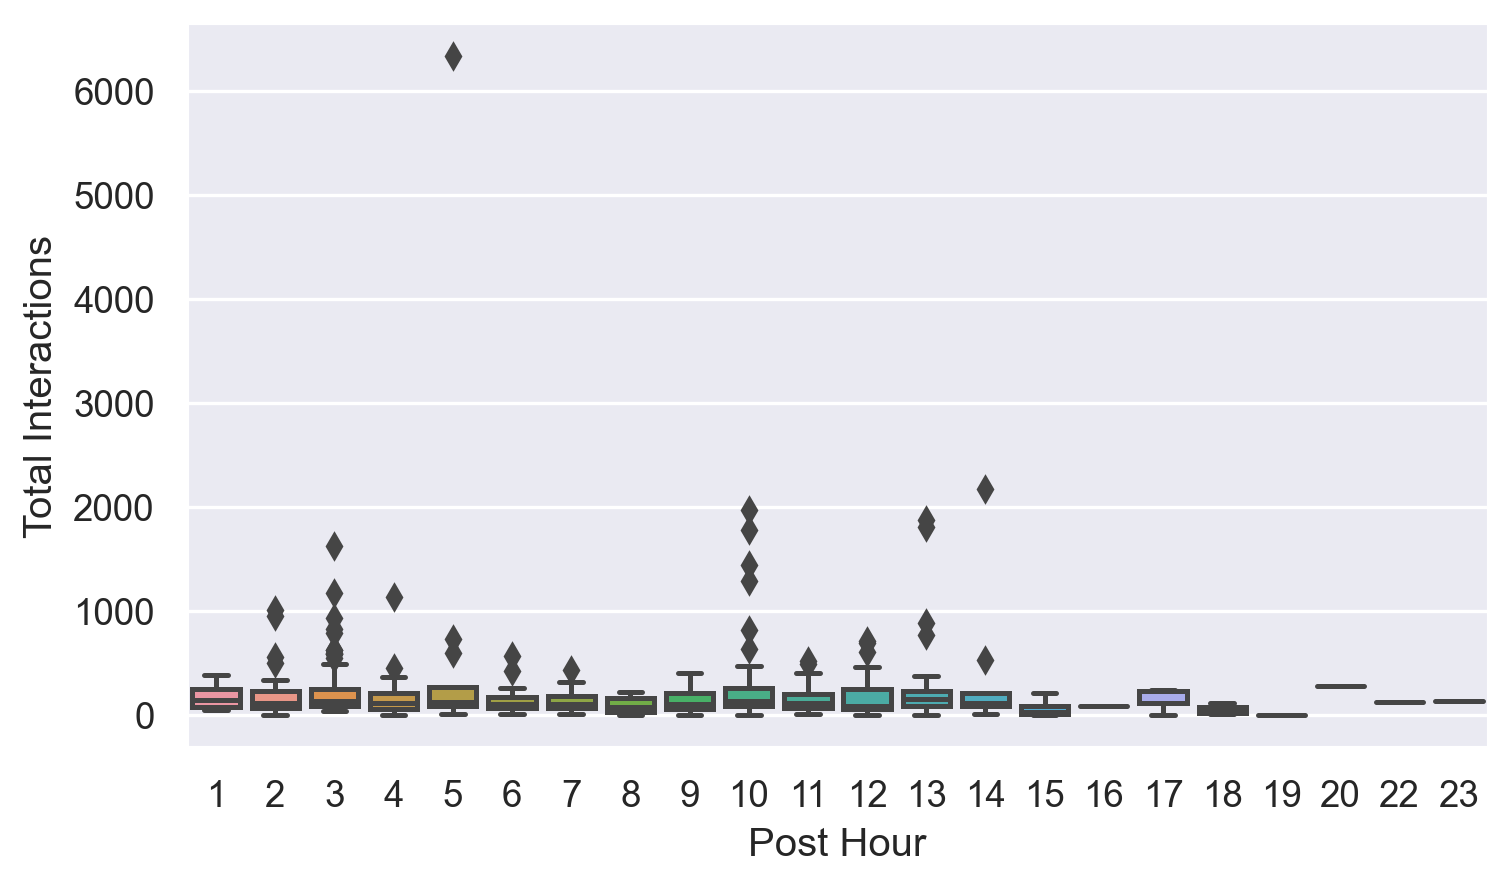

In [22]:
sns.boxplot(x='Post Hour', y='Total Interactions', data=data_raw);

#### <span style='color:blue'> Comment: </span>

It is quite evident that the data is distorted and the impact of some outliers on it. Data that is too skewed/distant from the normal distribution generally makes a good prediction difficult to achieve.

In [23]:
data_raw.sort_values('Total Interactions', ascending=False)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
244,130791,Photo,2,7,3,5,1.0,180480,319133,8072,4010,6242,108752,51456,3316,372,5172.0,790.0,6334
379,111620,Photo,3,4,1,14,1.0,105632,147918,3984,2254,3391,48575,27328,1936,51,1998.0,128.0,2177
168,135428,Photo,1,9,3,10,0.0,41984,68290,3370,2420,4074,34802,20928,2126,144,1622.0,208.0,1974
460,92507,Photo,3,2,1,13,0.0,55520,665792,4544,3586,6624,648611,47488,3430,146,1546.0,181.0,1873
349,117764,Photo,3,5,5,13,0.0,81856,124753,3000,1637,2718,52477,27392,1756,45,1639.0,122.0,1806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,137020,Photo,1,10,4,9,1.0,1357,2453,37,37,55,2154,1120,32,0,0.0,0.0,0
417,104070,Photo,1,3,3,10,0.0,1874,2474,25,25,31,1483,1062,15,0,0.0,0.0,0
111,136736,Photo,1,10,6,8,0.0,1261,2158,37,37,49,1911,1077,33,0,NaN,NaN,0
441,98195,Photo,1,3,5,4,1.0,1845,2670,9,9,9,1614,1008,9,0,0.0,0.0,0


In [24]:
# There is an outlier and since the number of observations is big enough the decision is to remove the outlier row
data_preserved = data_raw.copy()

In [42]:
data_raw = data_raw.drop(244)
data_raw.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


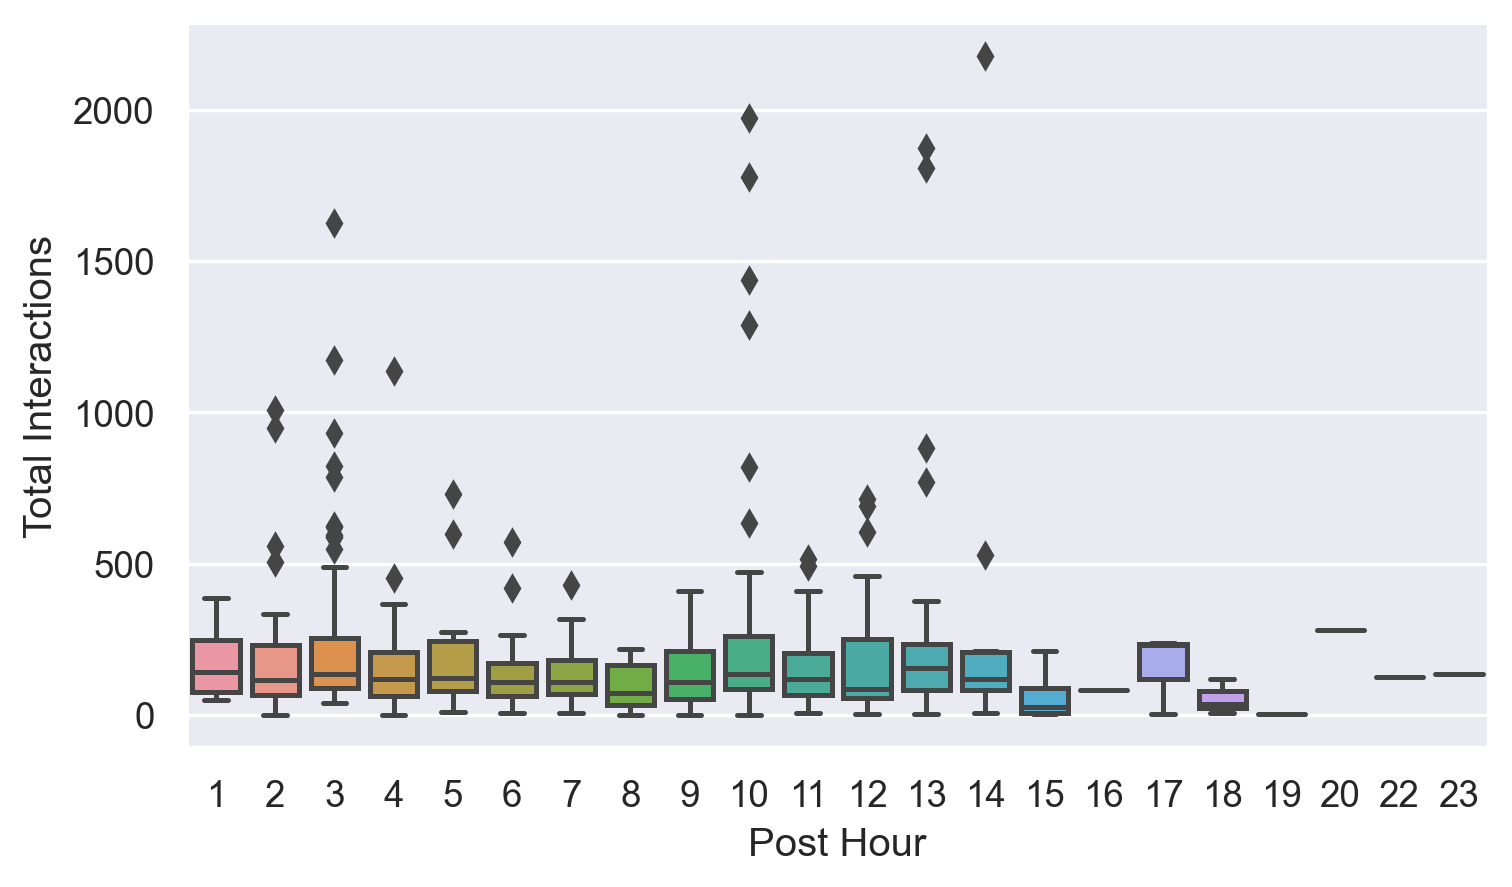

In [43]:
sns.boxplot(x='Post Hour', y='Total Interactions', data=data_raw);

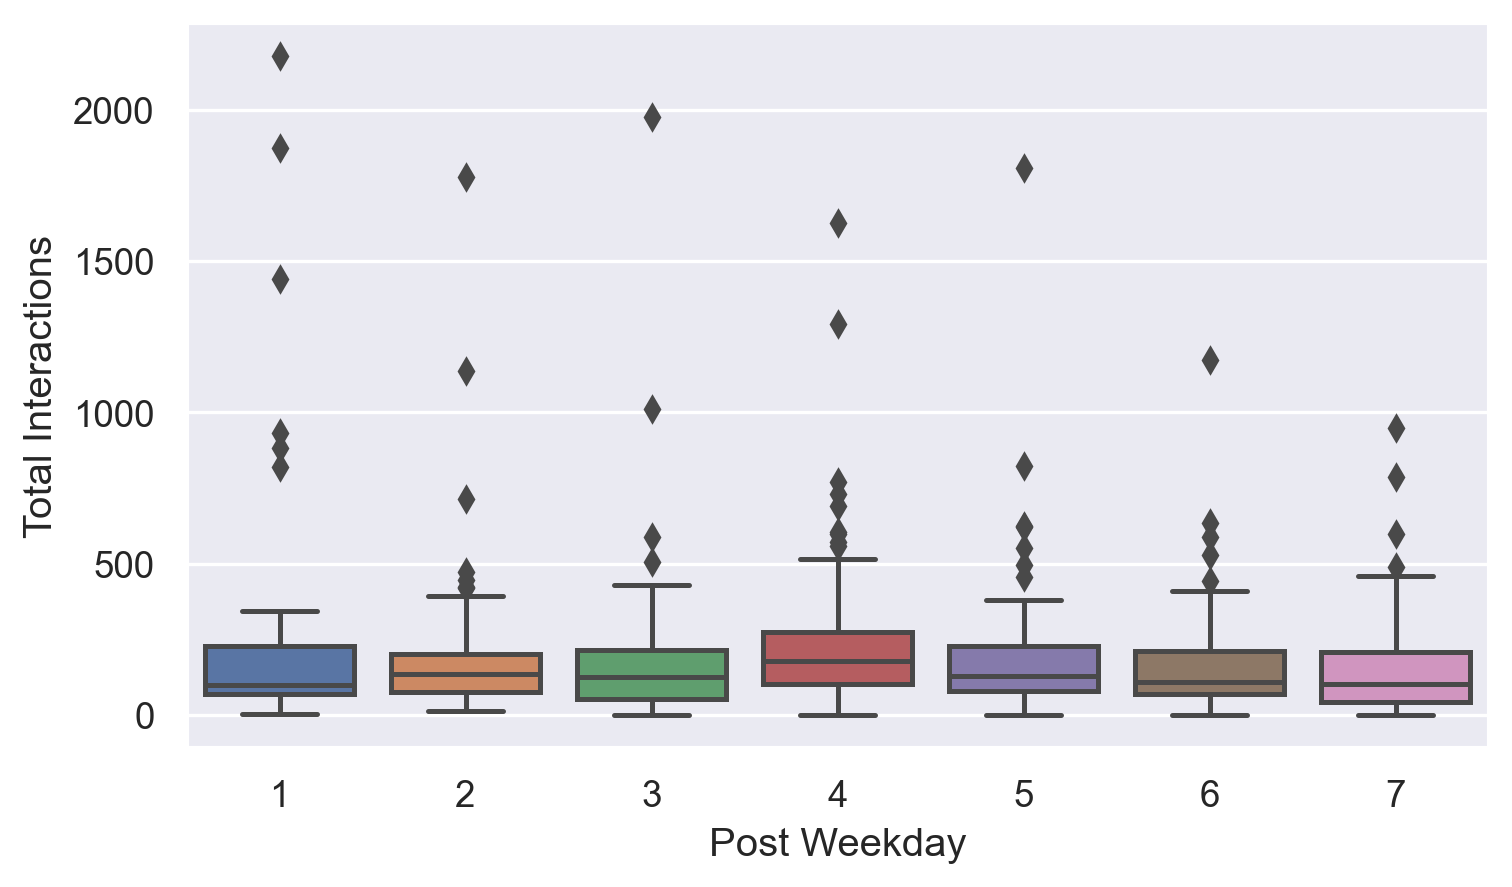

In [44]:
sns.boxplot(x='Post Weekday', y='Total Interactions', data=data_raw)

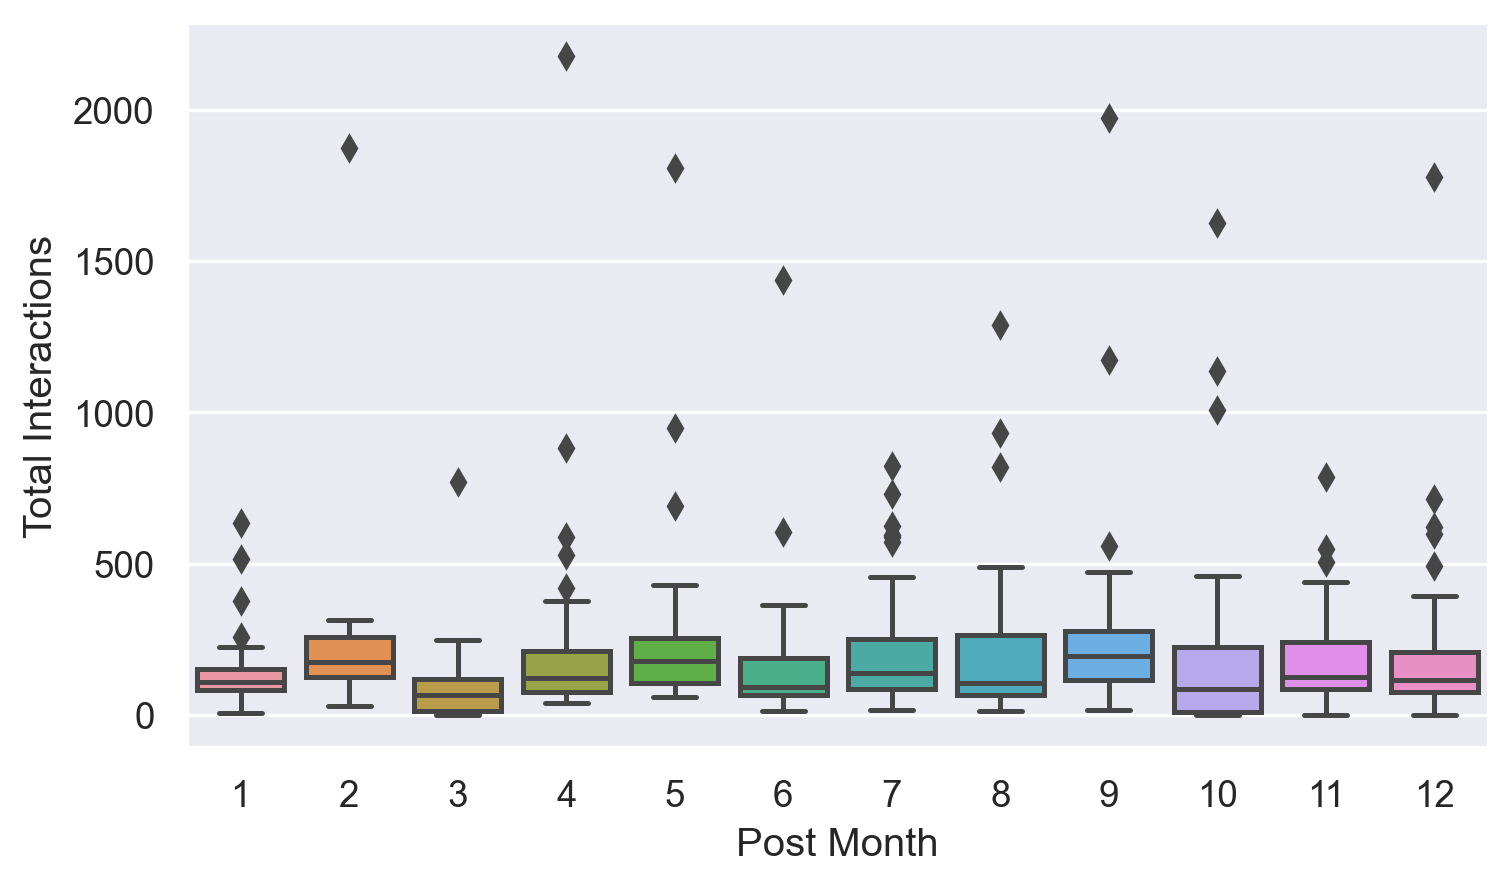

In [45]:
sns.boxplot(x='Post Month', y='Total Interactions', data=data_raw)

In [46]:
data_clean = data_raw.copy()
data_clean = data_clean.dropna()
data_clean.isna().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

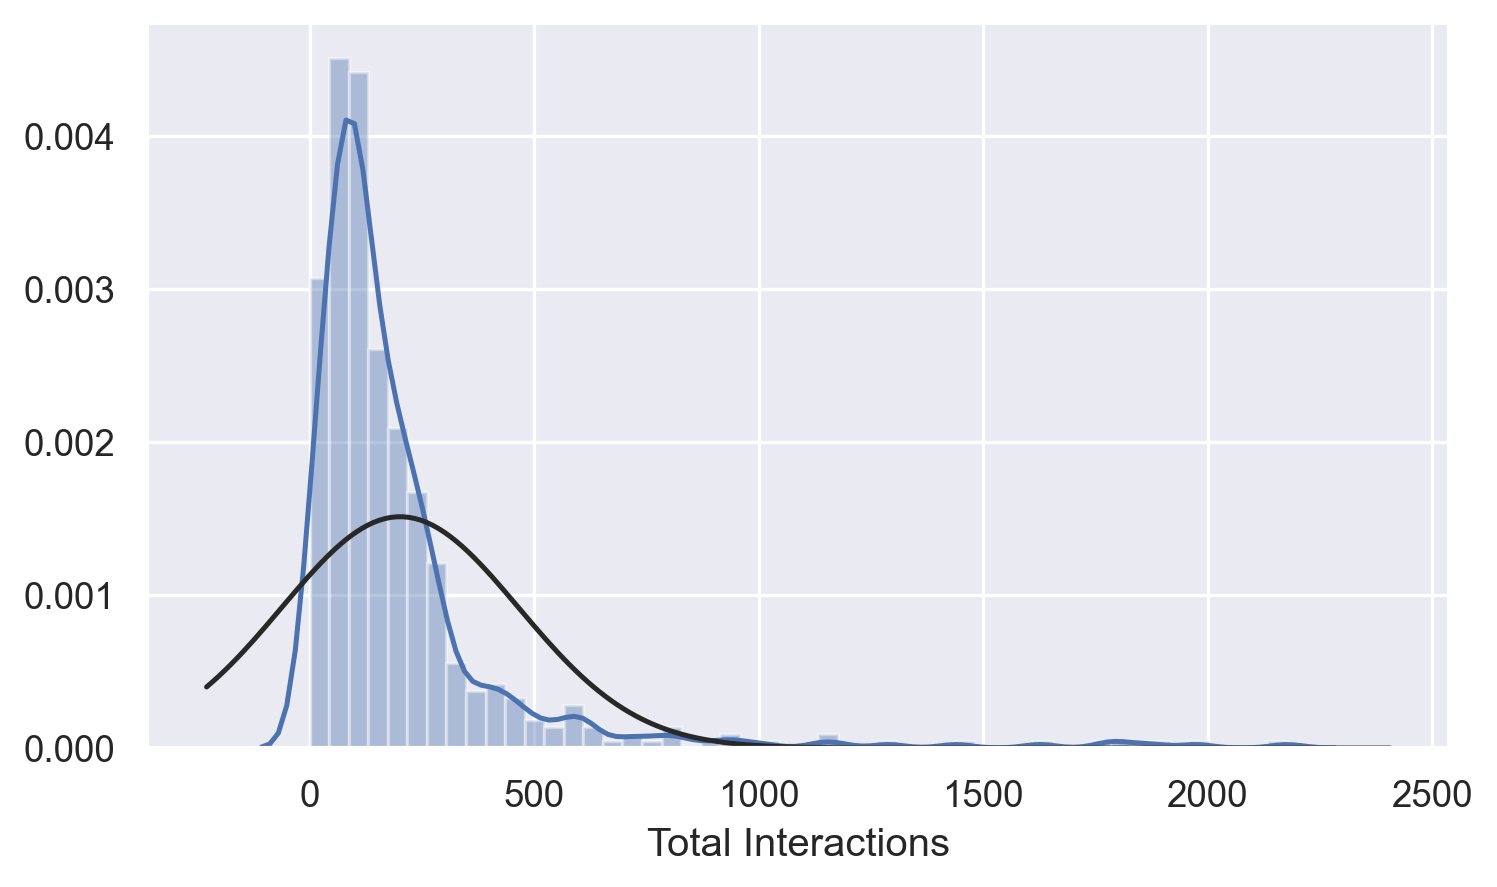

In [47]:
# sns.distplot(data_clean['Total Interactions']);
sns.distplot(data_clean['Total Interactions'], fit=norm);

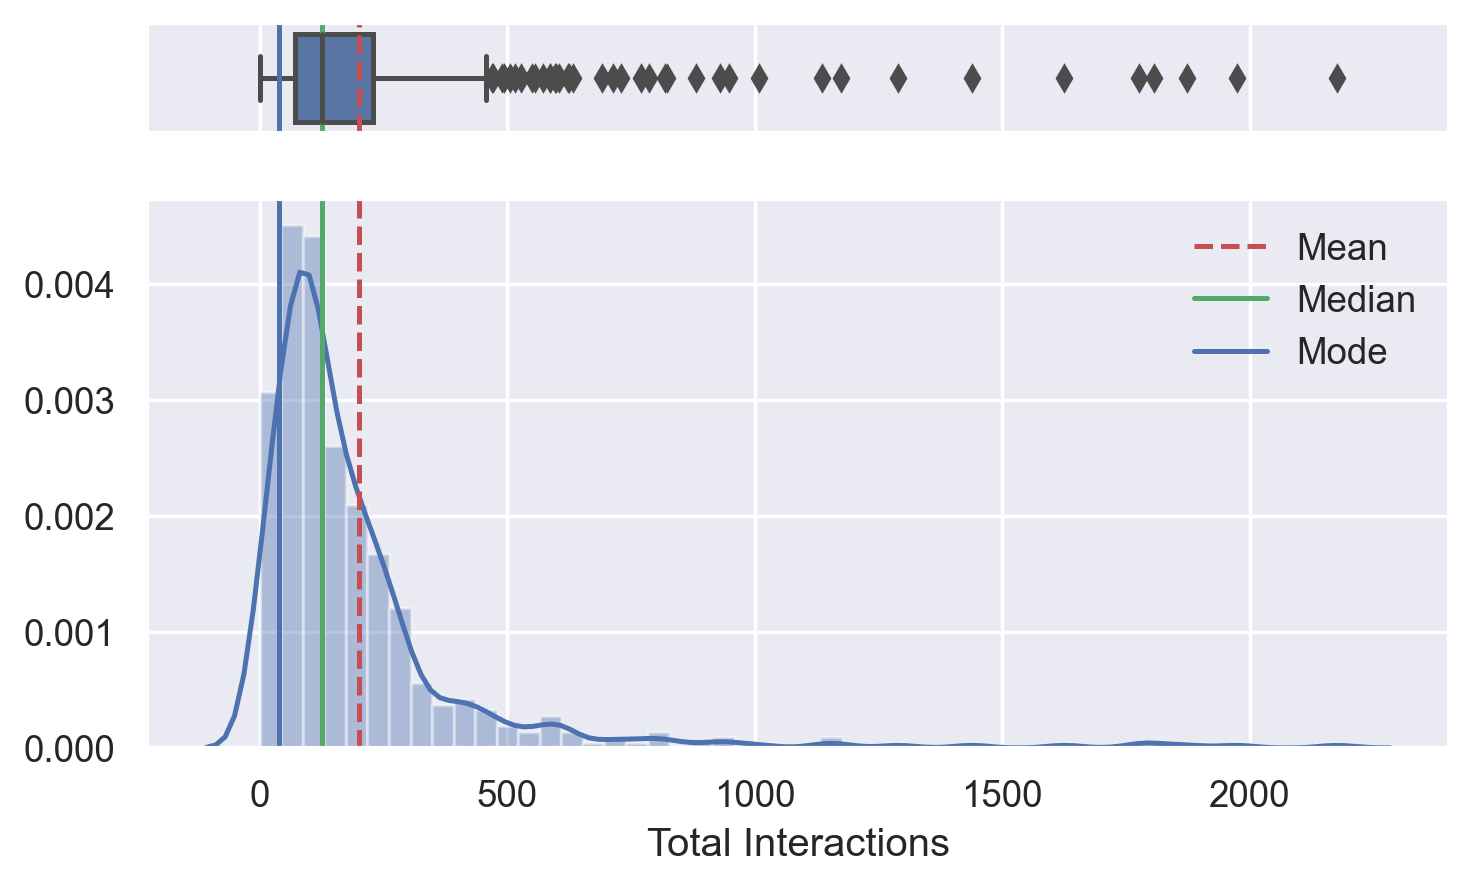

In [48]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=data_clean['Total Interactions'].mean()
median=data_clean['Total Interactions'].median()
mode=data_clean['Total Interactions'].mode().tolist()[0]

sns.boxplot(data_clean['Total Interactions'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(data_clean['Total Interactions'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

#### <span style='color:blue'> Comment: </span>
    
The features are definitely not standardized. There are still many outliers showing up in each boxplot above.<br/>

#### <span style='color:blue'> Scaling vs. Normalizing: </span>
Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.</i>

#### <span style='color:blue'> D'Agostino K^2 Test: </span>
This is a statistical test that tests whether a distribution is normally distributed or not:
* This test outputs a "p-value". The _higher_ this p-value is the _closer_ the distribution is to normal.
* Frequentist statisticians would say you should accept the distribution is normal (fail to reject the null hypothesis: It is normal!) if p > 0.05.

In [49]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
normaltest(data_raw['Total Interactions'].values)

NormaltestResult(statistic=455.7818330576617, pvalue=1.067167217614078e-99)

The p value is extremelly small. The data needs to be normalized.

In [50]:
from scipy.stats import boxcox

In [51]:
data_raw.shape

(499, 19)

In [52]:
data = data_raw['Total Interactions']

In [53]:
# boxcox only accepts POSITIVE value so we need to work around it
posdata = data[data>0]

In [54]:
bc_result = boxcox(posdata)
boxcox_int = bc_result[0]
lam = bc_result[1]

In [55]:
lam

0.15612405140437233

In [56]:
data_raw_total_normal = np.empty_like(data)
data_raw_total_normal[data > 0] = boxcox_int
data_raw_total_normal[data == 0] = -1/lam

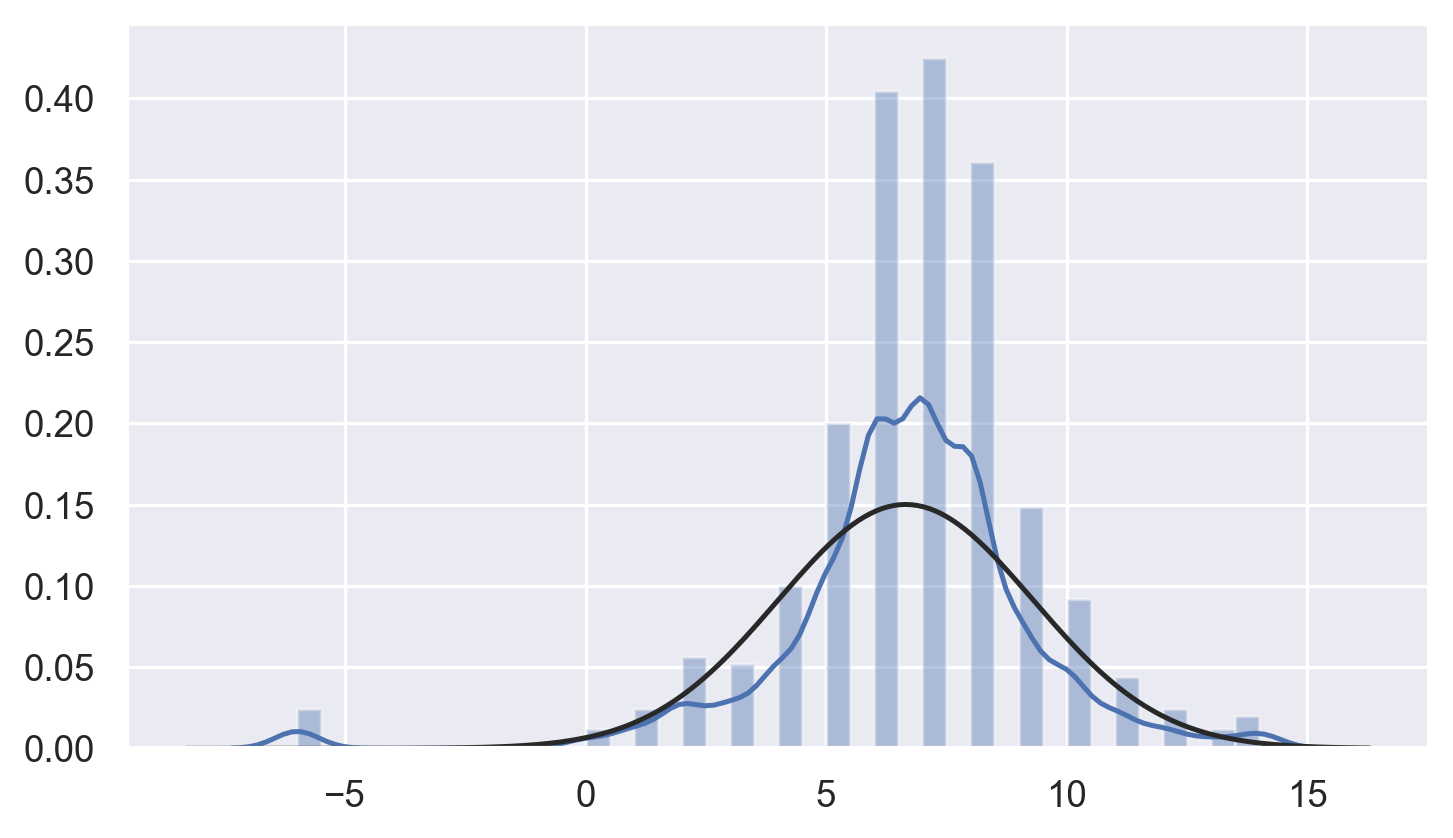

In [57]:
sns.distplot(data_raw_total_normal, fit=norm);

In [58]:
#p-value is too small still but much higher than before
normaltest(data_raw_total_normal)

NormaltestResult(statistic=141.54663850423472, pvalue=1.8345856105632955e-31)

##### Data relationships

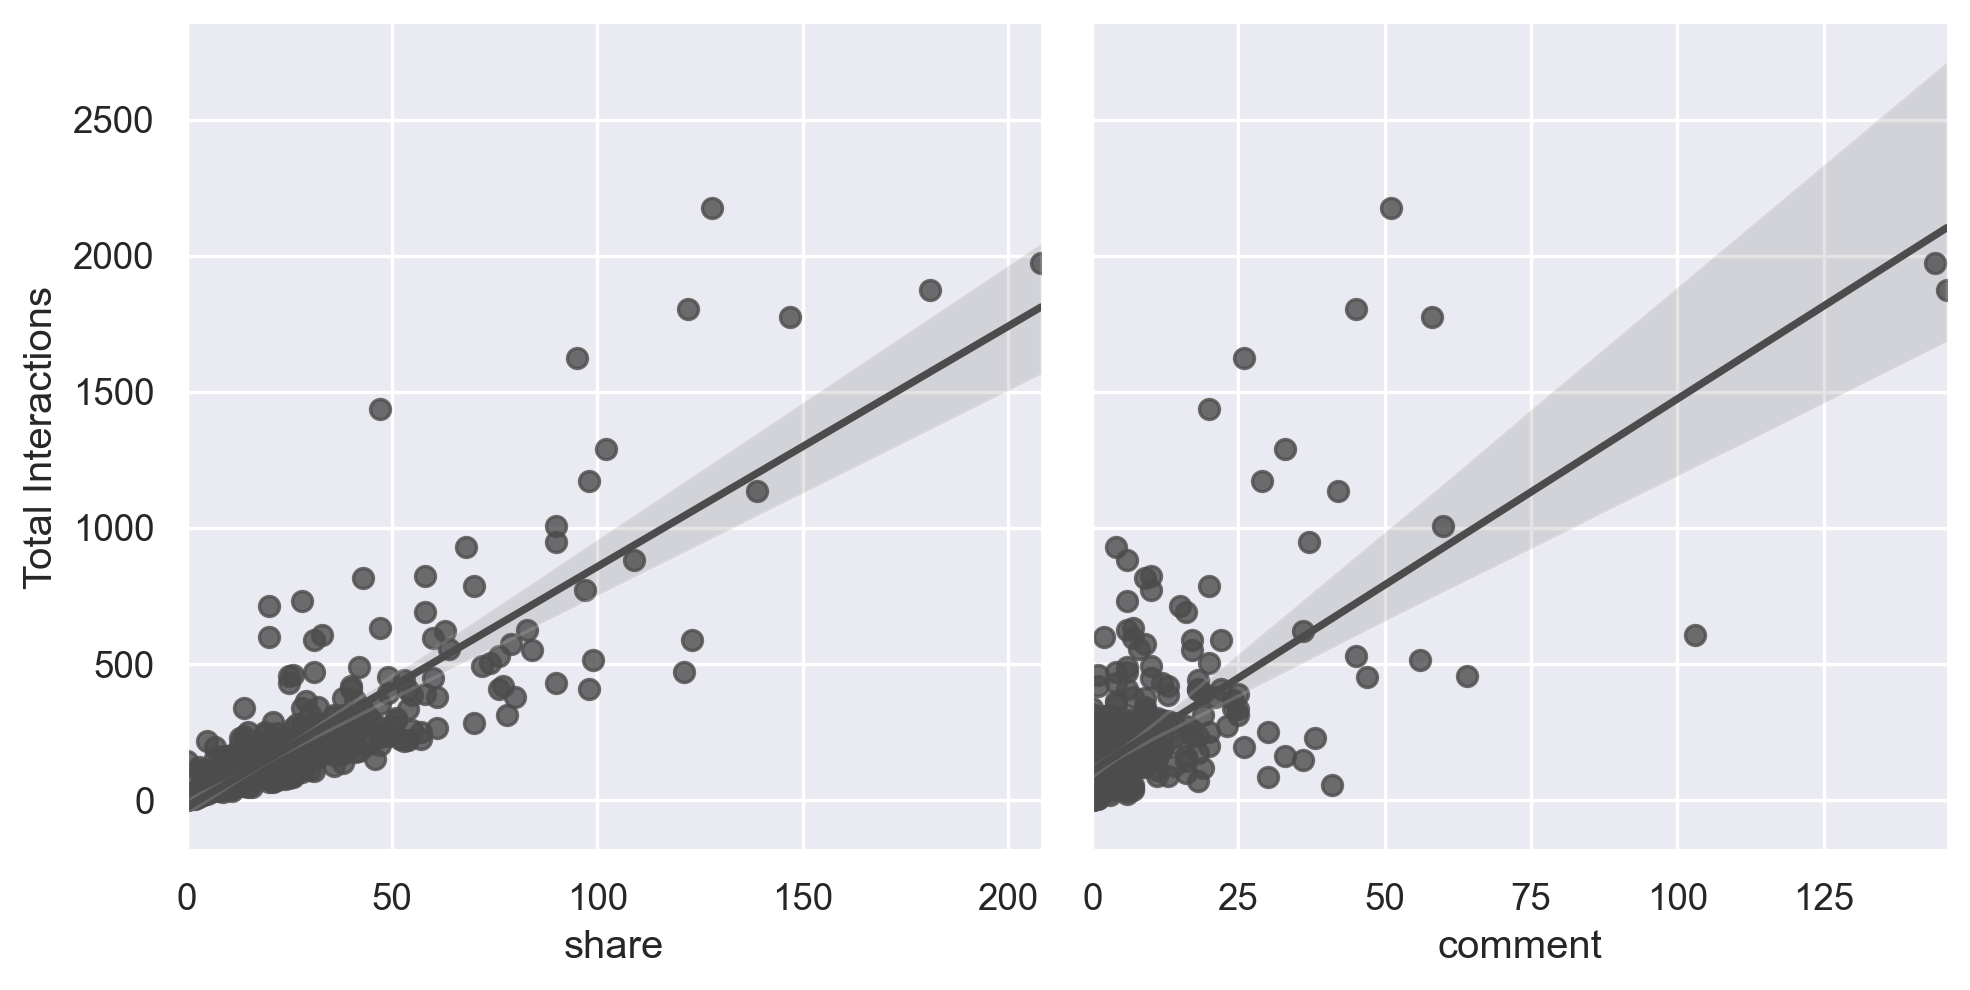

In [59]:
g = sns.PairGrid(data_raw, y_vars=["Total Interactions"], x_vars=["share", "comment"], height=4)
g.map(sns.regplot, color=".3")

There are relationships between share/comment and total interactions; which obviously makes sense right?

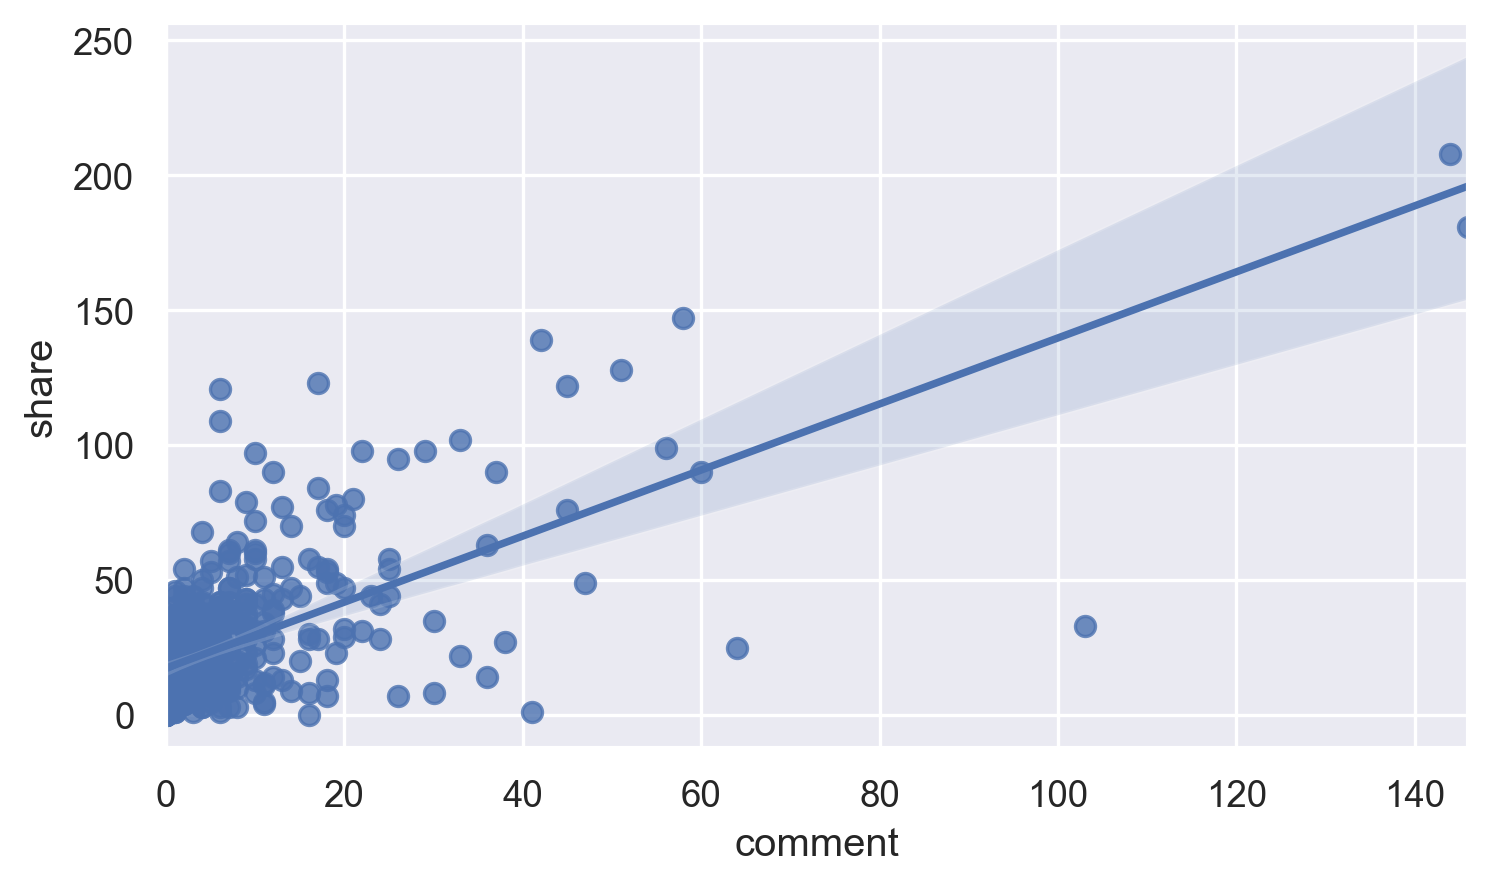

In [68]:
sns.regplot(x='comment', y='share', data=data_raw)

## <span style='color:blue'> Correlation and Heatmap </span>

OBS: I don't think it makes sense to insert the average of each feature in the NaN values. I believe it is best to discard each line that has NaN values. Since we have enough data for that.

In [61]:
data_clean['Type']

0       Photo
1      Status
2       Photo
3       Photo
4       Photo
        ...  
494     Photo
495     Photo
496     Photo
497     Photo
498     Photo
Name: Type, Length: 494, dtype: object

In [62]:
data_clean['Type'].nunique()

4

In [63]:
data_corr = data_clean.copy()

In [64]:
data_corr = data_corr.drop('Type', axis=1)

In [65]:
data_corr

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,85093,3,1,7,10,0.0,5400,9218,810,756,1003,5654,3230,422,10,125.0,41.0,176
495,85093,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115


#### <span style='color:blue'> Comment: </span>

'Page total like': 'PTL'<br/>
'Category': 'Cat'<br/>
'Post Month': 'PMonth'<br/>
'Post Weekday': 'Pweek'<br/>
'Post Hour': 'Phour'<br/>
'Paid': 'Paid'<br/>
'Lifetime Post Total Reach': 'LPTotReach'<br/>
'Lifetime Post Total Impressions': 'LPTotImpressions'<br/>
'Lifetime Engaged Users': 'LEngUsers'<br/>
'Lifetime Post Consumers': 'LPConsumers'<br/>
'Lifetime Post Consumptions': 'LPConsumptions'<br/>
'Lifetime Post Impressions by people who have liked your Page': 'LPIbylikedpage'<br/>
'Lifetime Post reach by people who like your Page': 'LPRbylikepage'<br/>
'Lifetime People who have liked your Page and engaged with your post': 'LPlikedpagepost'<br/>
'comment':'comment'<br/>
'like': 'like'<br/>
'share': 'share'<br/>
'Total Interactions': 'TI'<br/>


In [66]:
data_corr.columns = ['PTL', 'Cat', 'PMonth', 'Pweek', 'Phour', 'Paid', 'LPTotReach', 'LPTotImpressions', 'LEngUsers', 'LPConsumers', 'LPConsumptions', 'LPIbylikedpage', 'LPRbylikepage', 'LPlikedpagepost', 'comment', 'like', 'share', 'TI']

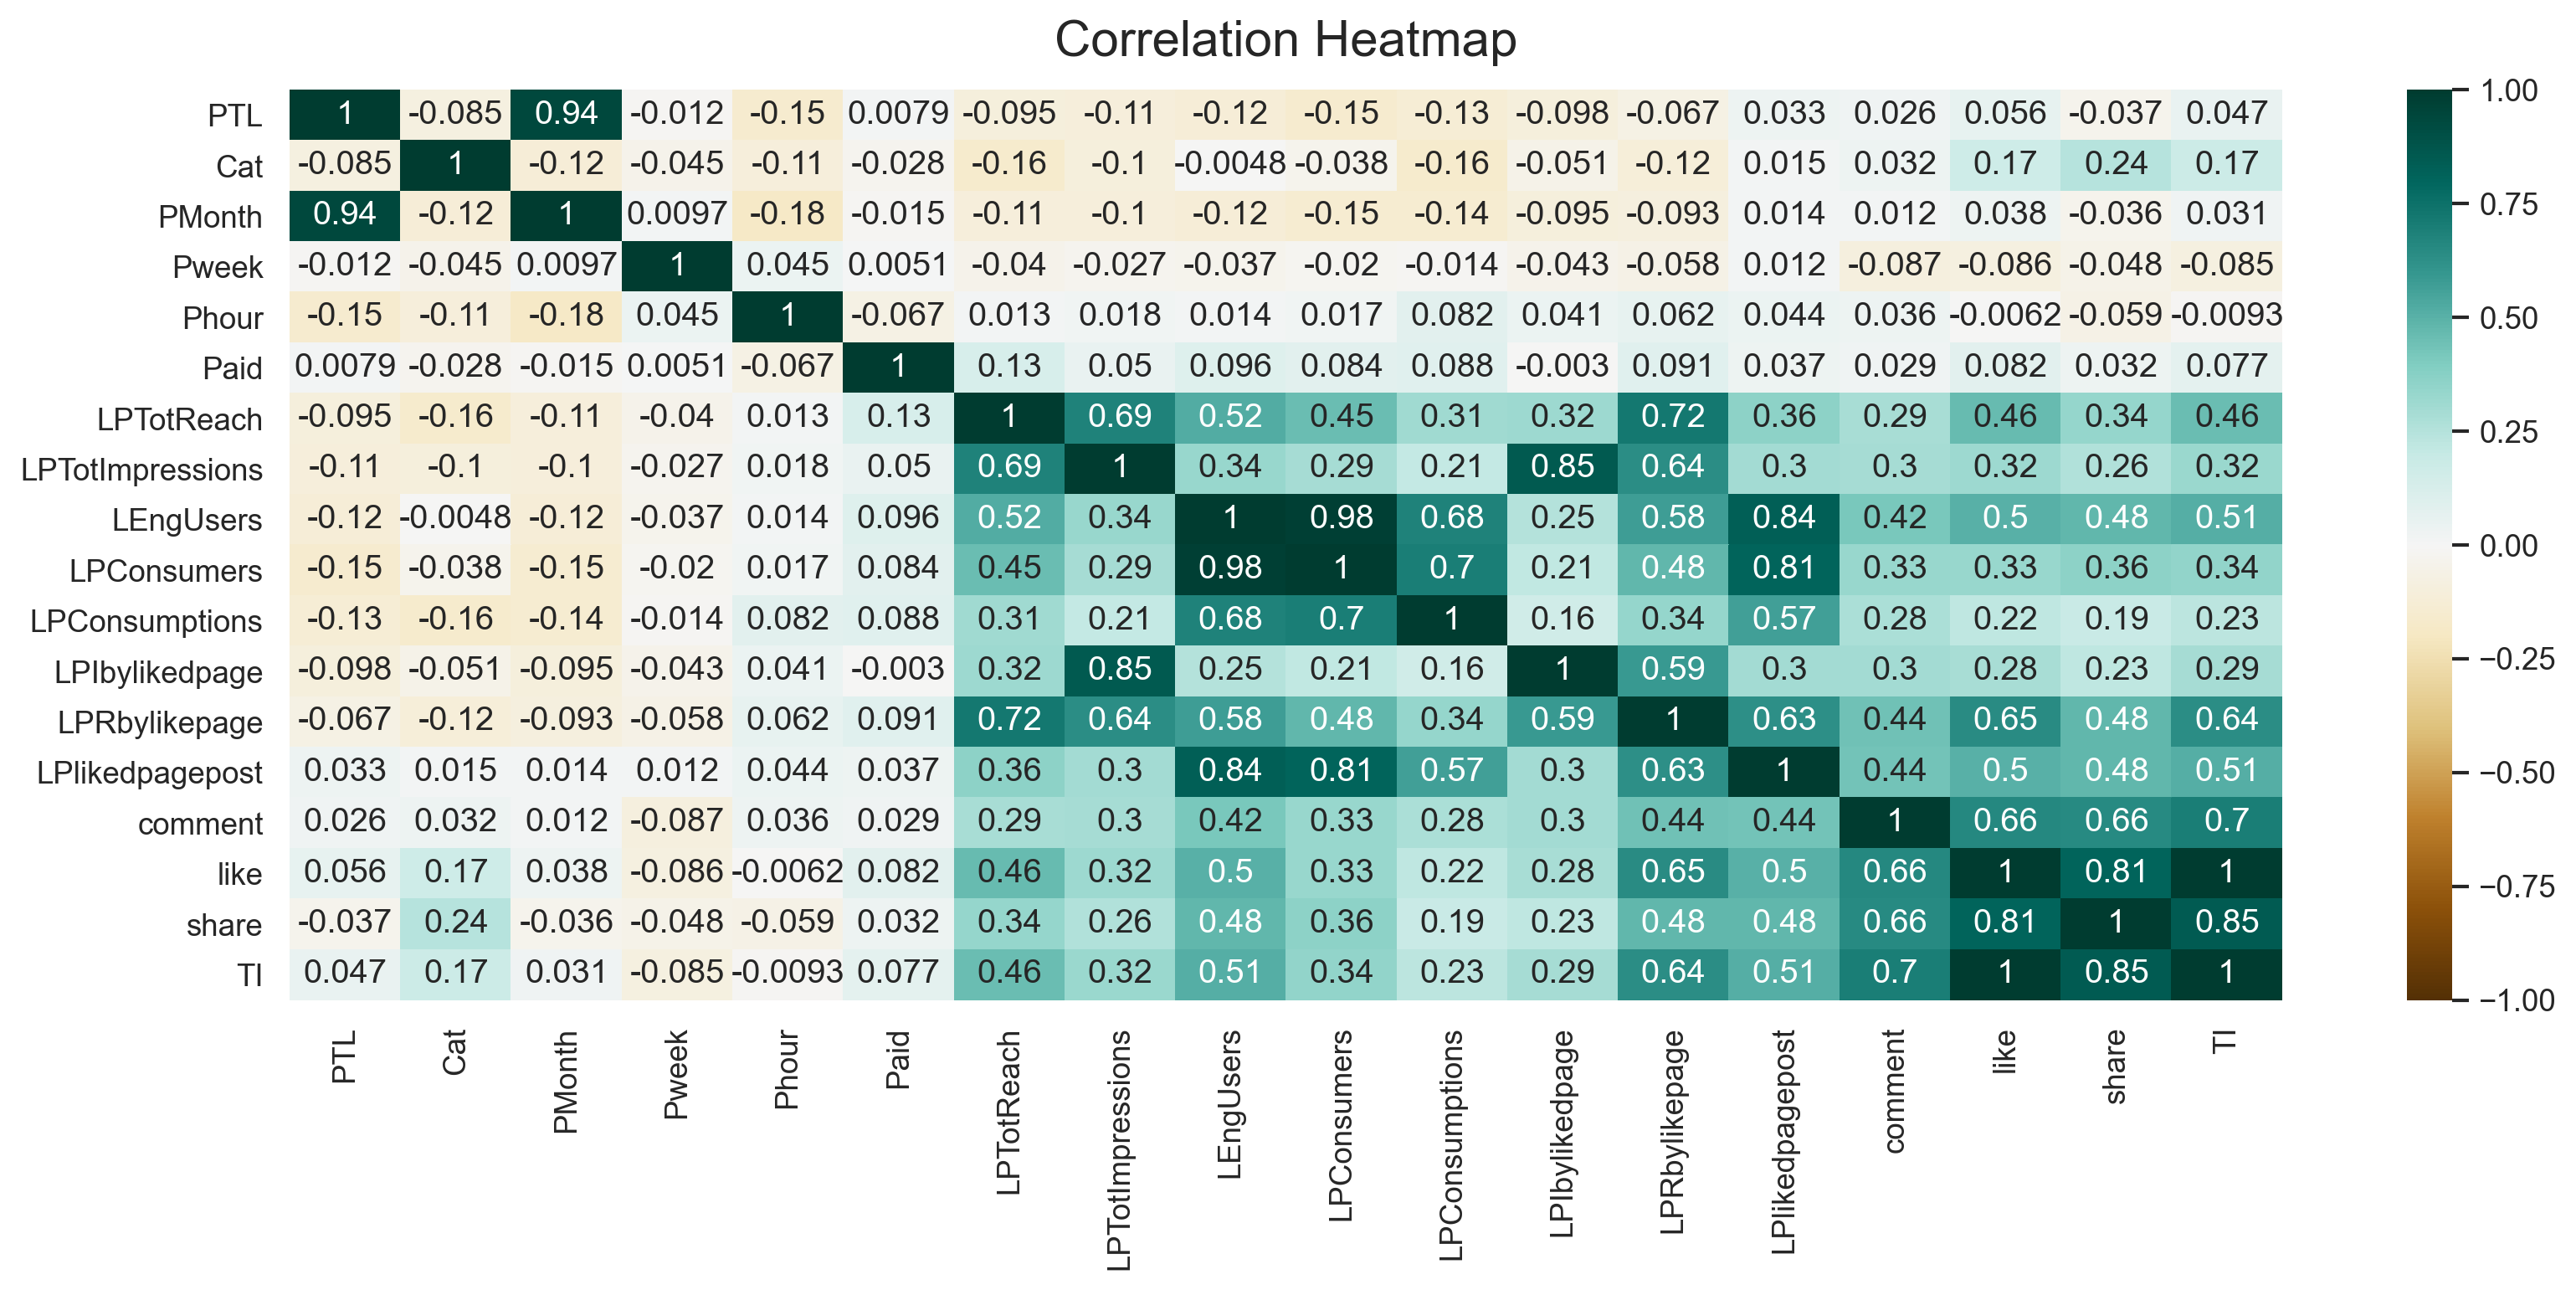

In [67]:
# data_corr = data_corr.drop(['Type'], axis=1)
plt.figure(figsize=(16,6))

# a better color to see the positive or negative correlation of each variable
heatmap = sns.heatmap(data_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

## <span style='color:green'> Conclusions </span>

There are a large number of relationships between different resources. We see a great correlation between 'Total interactions' and 'share', 'like' and 'comment'. We can see 'Lifetime post consumers' super correlated to 'Lifetime people who liked your page and engaged with your post'. In my opinion, it makes sense because we are exploring people's interaction with the website. These interactions can range from just a comment, or a share, or even a post being liked and a comment after that. <br/>

Let's not forget that correlation does not imply causation. We can find some cause after making regressions on the data, but at this point, we only have found correlation between them.

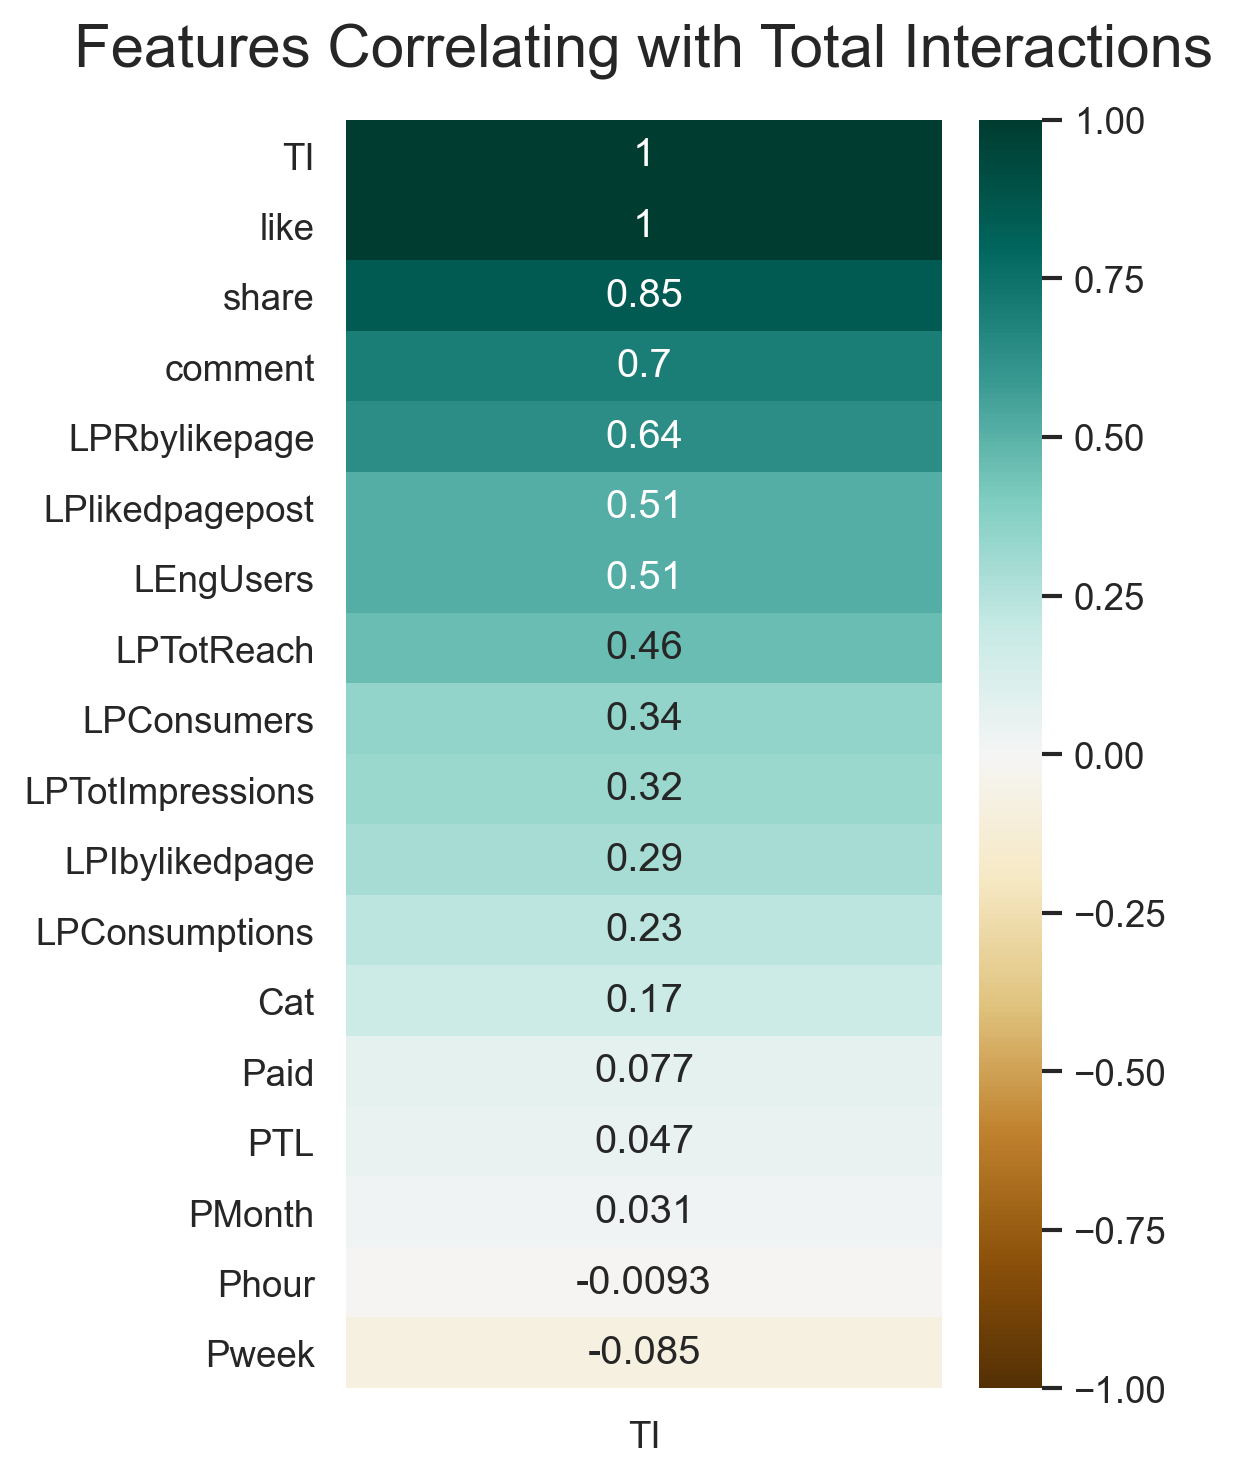

In [69]:
# Inspired by:
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(4,7))

heatmap = sns.heatmap(data_corr.corr()[['TI']].sort_values(by='TI', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Features Correlating with Total Interactions', fontdict={'fontsize':18}, pad=16);

## <span style='color:green'> Conclusions </span>

Here we can see 'Total Interactions' correlations in a Rank view with more features:<br/>
    
'Lifetime Post reach by people who like your Page': 'LPRbylikepage'<br/>
'Lifetime Engaged Users': 'LEngUsers'<br/>
'Lifetime Post Total Reach': 'LPTotReach'<br/>

## <span style='color:blue'> Feature Engineering </span>

Since the 'Type' column  is a categorical unordered variable, one hot encode will be used on it.

In [70]:
# IBM inspired:
# Selecting the columns that are object (string)
mask = data_clean.dtypes == np.object
categorical_cols = data_clean.columns[mask]
categorical_cols

Index(['Type'], dtype='object')

In [71]:
# IBM inspired:
# Determine how many extra columns would be created
num_ohc_cols = (data_clean[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))

# No need to encode if there is only one value (only columns that have more than 1 value should be encoded)
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot encode columns is one less than the number of categories
small_num_ohc_cols -= 1

# Since our values that are not unique or the number of different categories in the column is 4, then,
# 3 is the number of new columns needed.
small_num_ohc_cols.sum()

3

In [72]:
# IBM inspired:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

data_ohc = data_clean.copy()

le = LabelEncoder()

# ohc = OneHotEncoder(drop='first') -> higher interpretability
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Interger encode the string categories
    data_int = le.fit_transform(data_ohc[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)
    
    # One hot encode the data--this returns sparse array
    new_data_ohc = ohc.fit_transform(data_int.reshape(-1,1))
    
    # Create unique column names
    n_cols = new_data_ohc.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]
    
    # Create the new dataframe
    new_df = pd.DataFrame(new_data_ohc.toarray(),
                          index=data_ohc.index,
                          columns=col_names)
    
    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [73]:
# Those are the difference between the new One Hot Encoded column created;
data_ohc.shape[1] - data_clean.shape[1]

3

In [74]:
data_ohc.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,...,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Type_0,Type_1,Type_2,Type_3
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000,494.000000,...,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,123157.848178,1.886640,7.028340,4.135628,7.850202,0.279352,13691.153846,2.927140e+04,912.366397,797.665992,...,6550.637652,608.665992,6.819838,169.038462,25.720648,201.578947,0.044534,0.850202,0.091093,0.014170
std,16216.607430,0.854118,3.307623,2.032152,4.387636,0.449136,21576.461501,7.611188e+04,934.767369,874.215028,...,7438.574597,602.784795,13.548573,234.071062,25.314390,264.284239,0.206488,0.357235,0.288033,0.118311
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.000000,5.700000e+02,9.000000,9.000000,...,236.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,111972.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3330.500000,5.797500e+03,399.000000,335.000000,...,2210.500000,297.250000,1.000000,57.000000,10.000000,72.000000,0.000000,1.000000,0.000000,0.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5290.000000,9.076000e+03,628.000000,555.000000,...,3472.000000,415.000000,3.000000,101.000000,19.000000,125.000000,0.000000,1.000000,0.000000,0.000000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13200.000000,2.234050e+04,1062.000000,960.500000,...,7999.000000,656.750000,7.000000,187.750000,32.000000,229.500000,0.000000,1.000000,0.000000,0.000000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,158208.000000,1.110282e+06,11452.000000,11328.000000,...,48368.000000,4376.000000,146.000000,1998.000000,208.000000,2177.000000,1.000000,1.000000,1.000000,1.000000


## <span style='color:blue'> Linear Regression </span>

Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.<br/>

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [76]:
data_reg = data_ohc.copy()

In [77]:
data_reg.columns

Index(['Page total likes', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions', 'Type_0', 'Type_1',
       'Type_2', 'Type_3'],
      dtype='object')

In [78]:
linear_regression = LinearRegression()

In [79]:
y_col = 'Total Interactions'

X = data_reg.drop(y_col, axis=1)
y = data_reg[y_col]

##### Create Polinomial Features

In [80]:
#linear regression brings the Beta on it own
pf = PolynomialFeatures(degree=2, include_bias=False)

X_pf = pf.fit_transform(X)

In [81]:
X.shape

(494, 21)

In [82]:
#the iteractions between variables of the polynmial
X_pf.shape

(494, 252)

##### Train and test split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y,test_size=0.3, random_state=72018)

##### Fit `StandardScaler` on `X_train` as before

In [84]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

##### Linear regression

In [85]:
linear_regression.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = linear_regression.predict(X_test_s)

In [86]:
r2_score(y_pred, y_test)

0.9964830554895536

## <span style='color:green'> Conclusions </span>

The model achieves a great score. Hopefully it is a good score instead a case of overfitting. We will continue to explore more as we run through the exercises.

## <span style='color:blue'> One hot Encode <span style='color:red'> or </span> deleting categorical unordered data </span>

In [87]:
data_ohc

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,...,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Type_0,Type_1,Type_2,Type_3
0,139441,2,12,4,3,0.0,2752,5091,178,109,...,1640,119,4,79.0,17.0,100,0.0,1.0,0.0,0.0
1,139441,2,12,3,10,0.0,10460,19057,1457,1361,...,6112,1108,5,130.0,29.0,164,0.0,0.0,1.0,0.0
2,139441,3,12,3,3,0.0,2413,4373,177,113,...,1503,132,0,66.0,14.0,80,0.0,1.0,0.0,0.0
3,139441,2,12,2,10,1.0,50128,87991,2211,790,...,32048,1386,58,1572.0,147.0,1777,0.0,1.0,0.0,0.0
4,139441,2,12,2,3,0.0,7244,13594,671,410,...,3200,396,19,325.0,49.0,393,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,85093,3,1,7,10,0.0,5400,9218,810,756,...,3230,422,10,125.0,41.0,176,0.0,1.0,0.0,0.0
495,85093,3,1,7,2,0.0,4684,7536,733,708,...,2876,392,5,53.0,26.0,84,0.0,1.0,0.0,0.0
496,81370,2,1,5,8,0.0,3480,6229,537,508,...,2104,301,0,53.0,22.0,75,0.0,1.0,0.0,0.0
497,81370,1,1,5,2,0.0,3778,7216,625,572,...,2388,363,4,93.0,18.0,115,0.0,1.0,0.0,0.0


In [88]:
data_wihout_cat = data_clean.copy()

In [89]:
data_wihout_cat = data_wihout_cat.drop(['Type'], axis=1)
data_wihout_cat

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,85093,3,1,7,10,0.0,5400,9218,810,756,1003,5654,3230,422,10,125.0,41.0,176
495,85093,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115


In [90]:
from sklearn.model_selection import train_test_split

y_col = 'Total Interactions'

# Split the data that is not one-hot encoded
feature_cols = [x for x in data_wihout_cat if x != y_col]
X_data_wihout_cat = data_wihout_cat[feature_cols]
y_data_wihout_cat = data_wihout_cat[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data_wihout_cat, y_data_wihout_cat, test_size=0.3, random_state=42)

# Split the data that is is one-hot encoded
feature_cols = [x for x in data_ohc if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, test_size=0.3, random_state=42)

In [91]:
(X_train_ohc.index == X_train.index).all()

True

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

X_train_s = s.fit_transform(X_train)
LR.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = LR.predict(X_test_s)
mean_squared_error(y_test, y_pred)

1.190817832078915e-25

In [93]:
LR = LinearRegression()
X_train_ohc_s = s.fit_transform(X_train_ohc)
LR.fit(X_train_ohc_s, y_train_ohc)
X_test_ohc_s = s.transform(X_test_ohc)
y_pred = LR.predict(X_test_ohc_s)
mean_squared_error(y_test_ohc, y_pred)

4.1430593547676157e-26

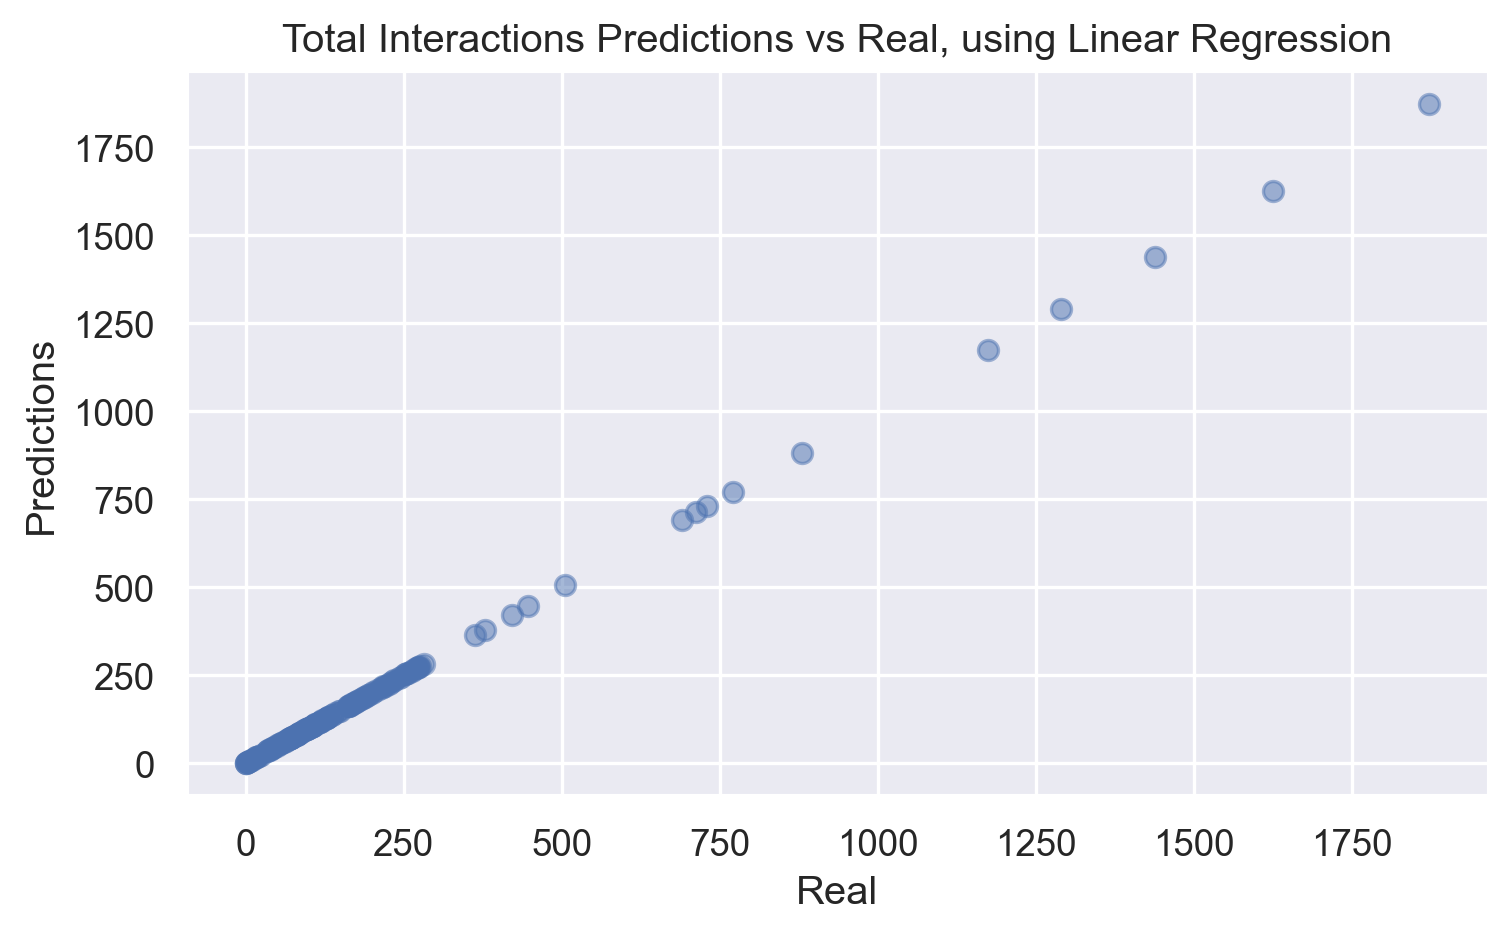

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test_ohc, y_pred, alpha=.5)

ax.set(xlabel='Real', 
       ylabel='Predictions',
       title='Total Interactions Predictions vs Real, using Linear Regression');

## <span style='color:green'> Conclusions </span>

The model looks overfitting. I will try the same applying the regularization later.<br/><br/>However, as the mean_square_error is smaller in the option with OneHotEncode than the experiment that I excluded the categorical column from the base data I will assume that the OneHotEncode option is better.

## <span style='color:blue'> Cross Validation and Pipeline </span>

In [97]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

#Obs: for vanilla linear regression with no regularization, scaling actually doesn't have a huge impact.


In [98]:
s = StandardScaler()
lr = LinearRegression()

estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

estimator.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [112]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

predictions = cross_val_predict(estimator, X_test, y_test, cv=kf)

In [113]:
predictions.shape

(149,)

In [114]:
y_test.shape

(149,)

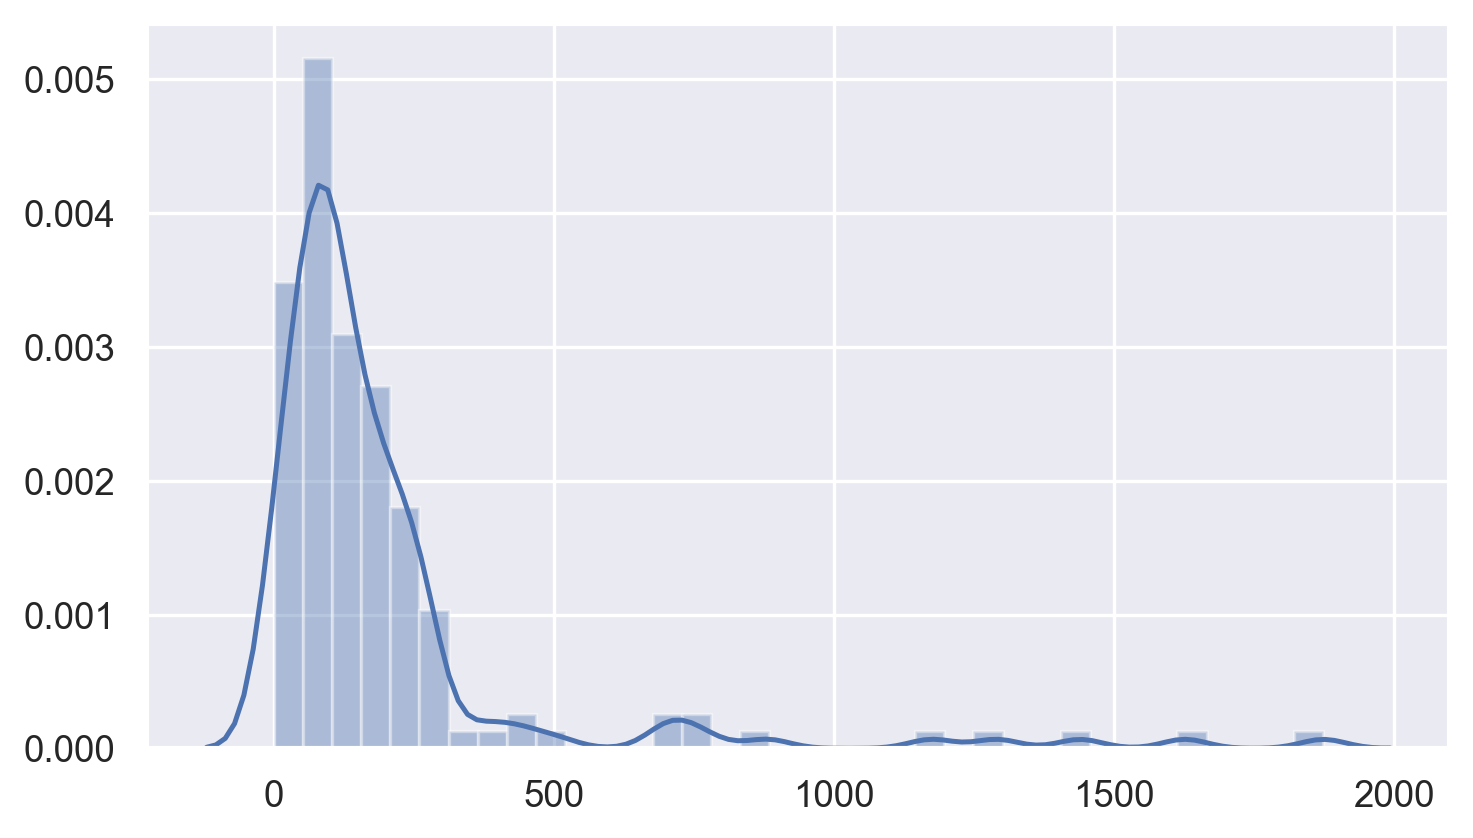

In [115]:
sns.distplot(predictions)

In [110]:
y_train.shape

(345,)

In [116]:
r2_score(y_test, predictions)

1.0

#### <span style='color:blue'> Comment: </span>

Here I have a score of 1.0, which means a perfect score. This is happening because I train the model with my X_train / y_train division and make the predictions with X_test / y_test, then I score based on y_test again. <br/>

The best approach here is to split the X and the main data into X_train, X_validation and X_test. To fit the model with X_train data, predict with validation and score with y_test. 

## <span style='color:blue'> Cross Validation, Pipeline, and Polynomial Features  </span>

In [119]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [120]:
pf = PolynomialFeatures(degree=3)

scores = []
#the higher the alpha, the less complex - the lower the alpha the more complex
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    #ridge or lasso the scalar is fundamental
    estimator = Pipeline([
        ("make_higher_degree", pf),
        ("scaler", s),
        ("lasso_regression", las)])
    
    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score_r2 = r2_score(y, predictions)
    
    scores.append(score_r2)
list(zip(alphas, scores))

[(1e-09, 0.9782655353075406),
 (1e-08, 0.9782656500504129),
 (1e-07, 0.9782667967549831),
 (1e-06, 0.9782781943993742),
 (1e-05, 0.9783809087369657),
 (0.0001, 0.9788437842055558),
 (0.001, 0.9690589787171552),
 (0.01, 0.995644334447188),
 (0.1, 0.9999994455215561),
 (1.0, 0.9999794182880897)]

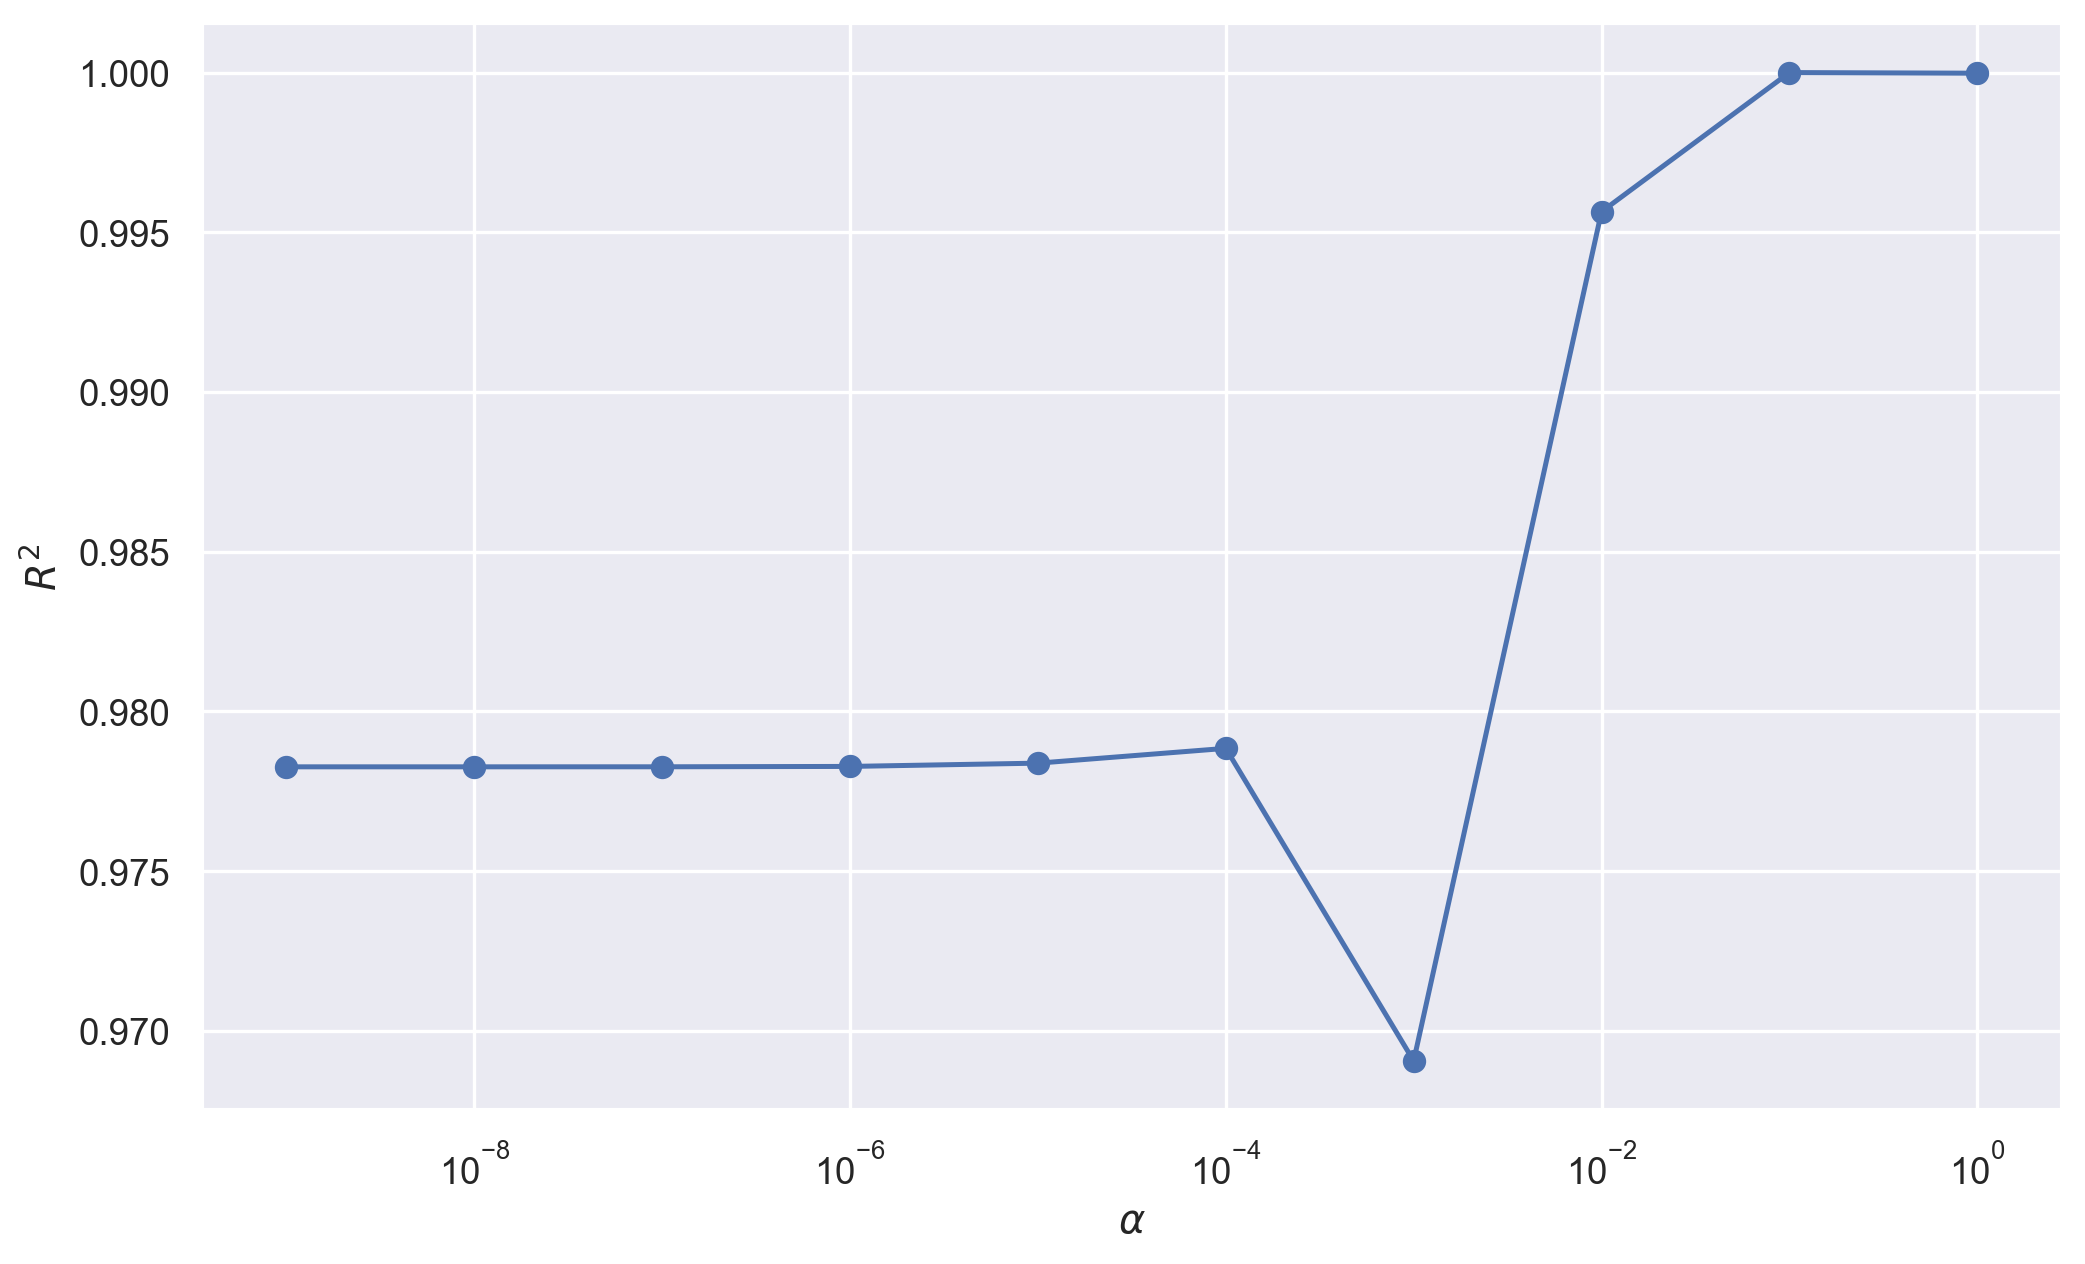

In [121]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

## <span style='color:green'> Conclusions </span>


It is pretty great to find the best alpha to be use in the model through the graphic, 1e-2 before the maximum overfitting.

##### Hyper parameter tuning

Hyperparameter tuning involves using cross validation (or train-test split) to determine which hyperparameters are most likely to generate a model that generalizes well outside of the sample.

In [126]:
best_estimator = Pipeline([
                ("scaler", s),
                ("make_higher_degree", PolynomialFeatures(degree=3)),
                ("lasso_regression", Lasso(alpha=0.1, max_iter=100000))])

best_estimator.fit(X, y)
best_estimator.score(X, y) #r2_score

0.9999992985302916

In [127]:
best_estimator.named_steps["lasso_regression"].coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
       -0.00000000e+00,  0.00000000e+00, -6.26480675e-05])

#### <span style='color:blue'> Comment: </span>

We can see that we are taking many coefficients to zero, which would make our bias super high and reduce the variance of our model. Basically, Lasso's behavior. <br/>


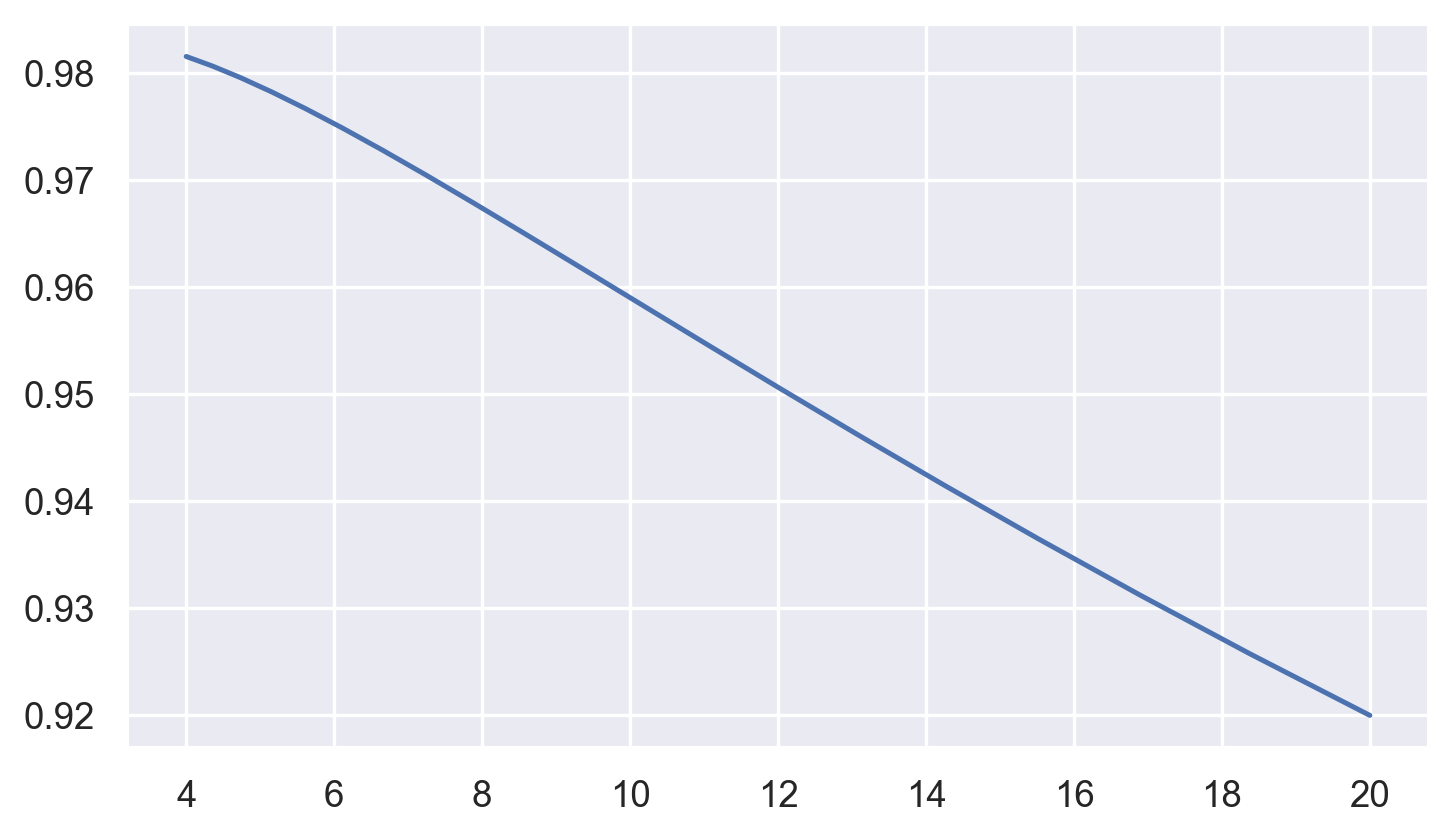

In [128]:
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(4, 20, 20)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("polynomial_features", pf),
        ("scaler", s),
        ("ridge_regression", ridge)])
    
    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

plt.plot(alphas, scores)

## <span style='color:green'> Conclusion: </span>

Both Lasso and Ridge with proper hyperparameter tuning give better results than plain old Linear Regression!<br/>

Of course, our data is great and allows for a beautiful score for models as regression, but even in this situation, the improvement is here.

No alpha value at all would be just an old plain linear regression.<br/>

Obs: When we apply the regularization with the models Lasso and Ridge we can see the impact in coefficients that holds the more importance, specially in Lasso that square the coefficients as we know.<br/>

In [130]:
df_importances = pd.DataFrame(zip(best_estimator.named_steps["make_higher_degree"].get_feature_names(input_features=X.columns),
                 best_estimator.named_steps["lasso_regression"].coef_,
))

In [131]:
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))

In [132]:
df_importances.sort_values(by=1)

,0,1
1187,Post Hour like^2,-0.017170
1941,comment^2 like,-0.006381
1632,Lifetime Engaged Users comment^2,-0.006019
1942,comment^2 share,-0.002227
1807,Lifetime Post Impressions by people who have l...,-0.000941
...,...,...
498,Category^2 like,0.054697
225,comment^2,0.067462
15,comment,13.162873
17,share,25.343774


Let's not forget that comment, share and like are supper high correlated with Total Interactions as well.

#### <span style='color:blue'> Comment: </span>

There are three ways to plain around with CV:

Cross-validation:
- `KFolds`, `cross_val_predict`, `score`.

Hyper-parameter tuning:
- use `cross_val_predict` and `score` in a manually written loop over hyperparemeters, then select the best one.

GridSearchCV: does everything

## <span style='color:blue'> GridSearchCV </span>

In [133]:
kf

KFold(n_splits=3, random_state=72018, shuffle=True)

In [134]:
from sklearn.model_selection import GridSearchCV

estimator = Pipeline([("scaler", StandardScaler()),
                      ("polynomial_features", PolynomialFeatures()),
                      ("ridge_regression", Ridge())])

# we use the same name above "polynomial_features" +"__" + "any element that PolynomialFeatures() can"
# hold on it, example: 'polynomial_features__degree': [1, 2, 3]

params = {
    'polynomial_features__degree': [1,2,3],
    'ridge_regression__alpha': np.geomspace(4, 20, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [135]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.22826702,  4.46956049,  4.7246238 ,  4.99424274,
        5.27924796,  5.58051751,  5.89897953,  6.23561514,  6.59146146,
        6.96761476,  7.36523392,  7.78554391,  8.22983963,  8.69948987,
        9.19594151,  9.72072404, 10.27545421, 10.86184103, 11.48169104,
       12.13691388, 12.82952815, 13.56166768, 14.33558803, 15.15367351,
       16.01844446, 16.93256509, 17.89885162, 18.92028098, 20.        ])})

In [136]:
grid.best_score_, grid.best_params_

(0.9986813870551545,
 {'polynomial_features__degree': 1, 'ridge_regression__alpha': 4.0})

In [137]:
y_predict = grid.predict(X_test)

In [138]:
r2_score(y_test, y_predict)

0.9994074548168591

#### <span style='color:blue'> Comment: </span>

GridSearchCV takes a model (or pipeline) and a dictionary of parameters to scan over. It finds the hyperparameter set that has the best out-of-sample score on all the parameters, and calls that it's "best estimator". It then retrains on all data with the "best" hyper-parameters.

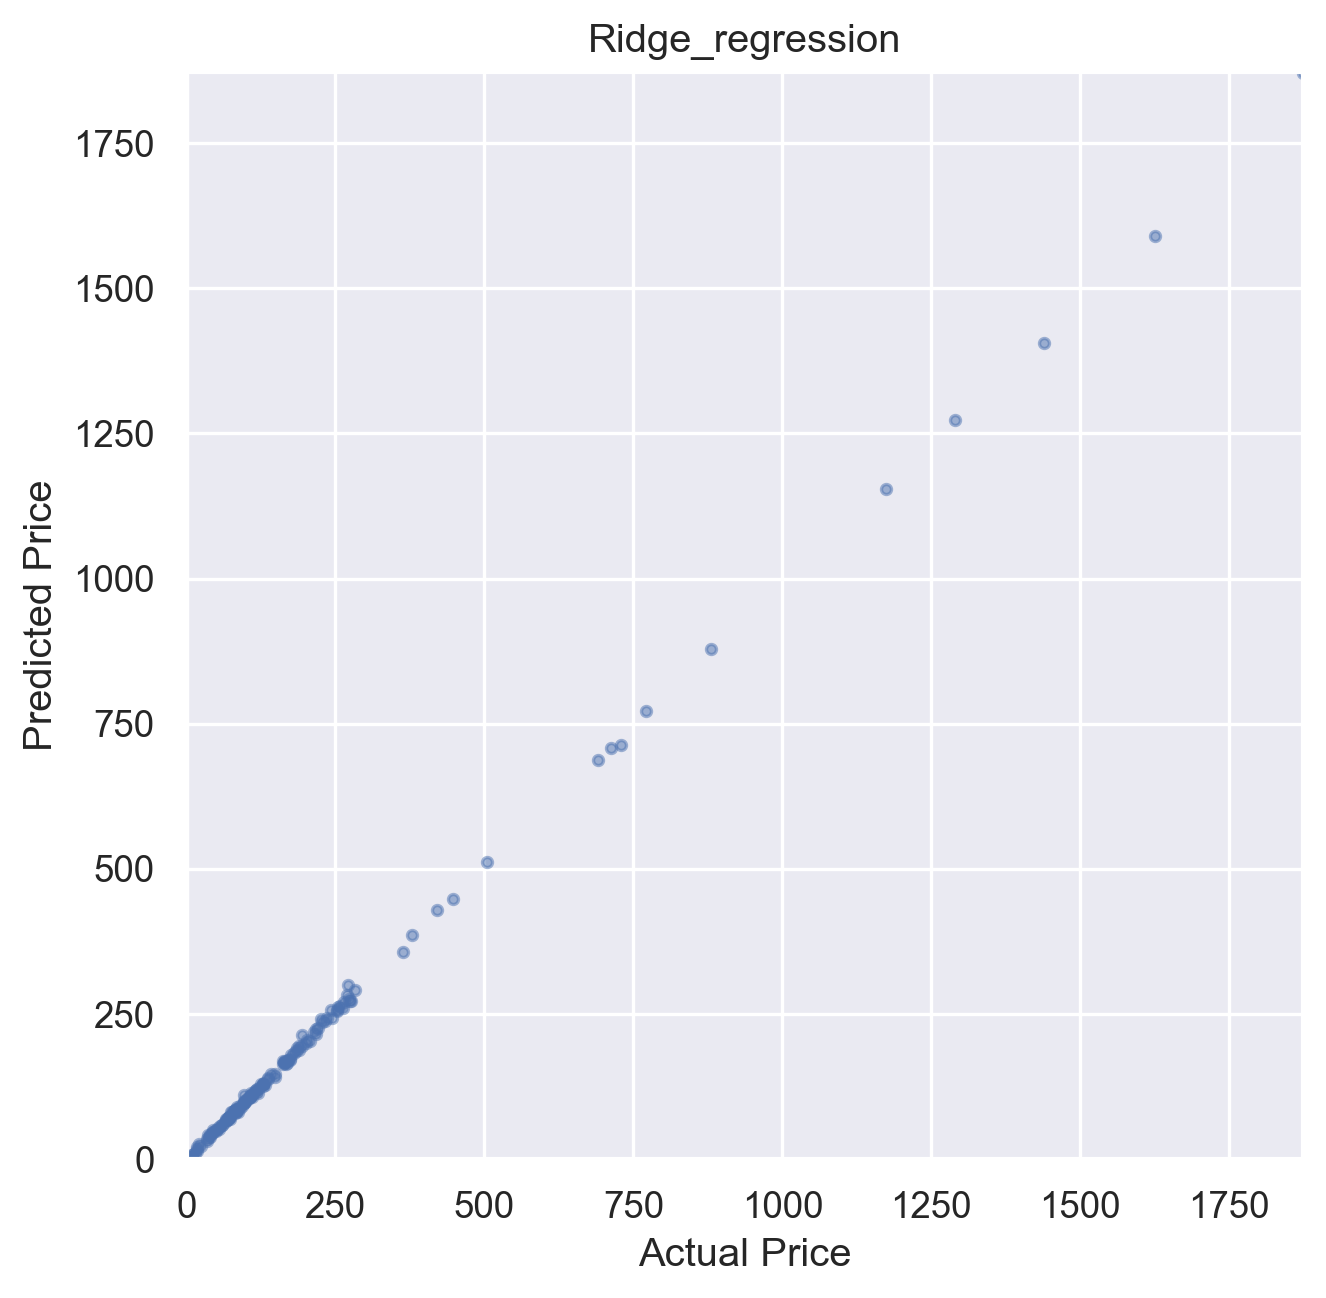

In [139]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, y_predict, 
         marker='o', ls='', ms=3.0, alpha=.5)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', ylabel='Predicted Price', xlim=lim, ylim=lim, title='Ridge_regression');

#### <span style='color:blue'> Comment: </span>

Isn't it beautiful?

## <span style='color:blue'> LinearRegression, RidgeCV, LassoCV, ElasticNetCV, SGDRegressor </span>

* root_mean_squared_error

In [141]:
from sklearn.metrics import mean_squared_error


def rmse(yreal, ypredict):
    return np.sqrt(mean_squared_error(yreal, ypredict))

##### LinearRegression

In [142]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

3.235451105297217e-12


##### RidgeCV

In [143]:
from sklearn.linear_model import RidgeCV

alphas = [0.005,0.05,0.1,0.3,1,3,5,10,15,30,80]

ridgeCV = RidgeCV(alphas=alphas, cv=5).fit(X_train, y_train)
ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))
print(ridgeCV.alpha_, ridgeCV_rmse)

0.005 1.9601239752800646e-06


In [144]:
print('Of {} coefficients, {} are non-zero with Ridge.'.format(len(ridgeCV.coef_), 
                                                               len(ridgeCV.coef_.nonzero()[0])))

Of 17 coefficients, 17 are non-zero with Ridge.


##### LassoCV

In [145]:
# Lasso is slower, take more coefficient to zero
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])
# The higher the lambda, the higher the bias, the smaller the variance and the higher the number of 0 coefficients
alphas3 = np.array([10])

lassoCV = LassoCV(alphas=alphas3, cv=5).fit(X_train, y_train)
lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))
print(lassoCV.alpha_, lassoCV_rmse)

10 1.3184270394323314


#### <span style='color:blue'> Comment: </span>

With more regularization (higher alpha) we will expect the penalty for higher weights to be greater and thus the coefficients to be pushed down. Thus a higher alpha means lower magnitude with more coefficients pushed down to 0.

In [146]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 17 coefficients, 11 are non-zero with Lasso.


##### ElasticNetCV

In [147]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)
elasticNetCV = ElasticNetCV(alphas=alphas2, l1_ratio=l1_ratios,max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

1e-05 0.2 2.0608912751650776


In [148]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,3.235451e-12
Ridge,1.960124e-06
Lasso,1.318427e+00
ElasticNet,2.060891e+00


## <span style='color:green'> Conclusion </span>

In this case, for root_square_mean_error, the linear regression has a smaller error, or a better prediction.

##### SGDRegressor

Linear models in general are sensitive to scaling. SGD is *very* sensitive to scaling. A high value of learning rate can cause the algorithm to diverge, whereas a too low value may take too long to converge since we are using a Gradient Descent approach.

IBM exercise:
* Fit a stochastic gradient descent model without a regularization penalty (the relevant parameter is `penalty`).
* Now fit stochastic gradient descent models with each of the three penalties (L2, L1, Elastic Net) using the parameter values determined by cross validation above. 
* Do not scale the data before fitting the model.  
* Compare the results to those obtained without using stochastic gradient descent.


In [151]:
from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2', 'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1', 'alpha': ridgeCV.alpha_},
    'ElasticNet': {'penalty': 'elasticnet',
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))
    
rmse_df["RMSE-SGD"] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD
Linear,3.235451e-12,5.288097e+18
Ridge,1.960124e-06,1.182899e+19
Lasso,1.318427e+00,1.122702e+19
ElasticNet,2.060891e+00,3.572406e+19


Notice how high the error values are! The algorithm is diverging. This can be due to scaling and/or learning rate being too high. Let's adjust the learning rate and see what happens.

* Pass in `eta0=1e-7` when creating the instance of `SGDClassifier`.
* Re-compute the errors for all the penalties and compare.

In [152]:
from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2', 'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1', 'alpha': ridgeCV.alpha_},
    'ElasticNet': {'penalty': 'elasticnet',
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # dict items as arguments
    SGD = SGDRegressor(eta0=1e-7, **parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))
    
rmse_df["RMSE-SGD-learningrate"] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate
Linear,3.235451e-12,5.288097e+18,3.082057e+14
Ridge,1.960124e-06,1.182899e+19,1.307400e+15
Lasso,1.318427e+00,1.122702e+19,1.139259e+15
ElasticNet,2.060891e+00,3.572406e+19,8.102308e+14


In [153]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))
    
rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,3.235451e-12,5.288097e+18,3.082057e+14,1.775441
Ridge,1.960124e-06,1.182899e+19,1.307400e+15,1.753864
Lasso,1.318427e+00,1.122702e+19,1.139259e+15,219.634460
ElasticNet,2.060891e+00,3.572406e+19,8.102308e+14,1.733574


## <span style='color:green'> Conclusion </span>

<i>RMSE:</i> We can see that the RMSE is an optimal model for the problem in question, however, it can be overfitting. To correct overfitting, we can use regularization approaches that can be Polynomial Features, StandardScales, MinMaxScalar, Hyperparameter Tunning or even use different models.<br/>

<i>RMSE-SGD:</i> The SGDRegressor is an interesting approach, however, we see a super high root_mean_square_error that is explained by the algorithm diverging from the minimum plan value. We need to fix the learning rate or the "leaps" for each iteration so that we don't run into diversing from the minimum cost.<br/>

<i>RMSE-SGD-learning_rate:</i> One way to escape the divergent behavior of the Stochastic Gradient Regressor is to apply the "eta" argument, or a new learning rate.<br/>

<i>RMSE-SGD-scaled:</i> As we know, the stochastic gradient descent is super sensitive to data normalization and in this case it is really great to see the effect on our root_mean_square_error.<br/>

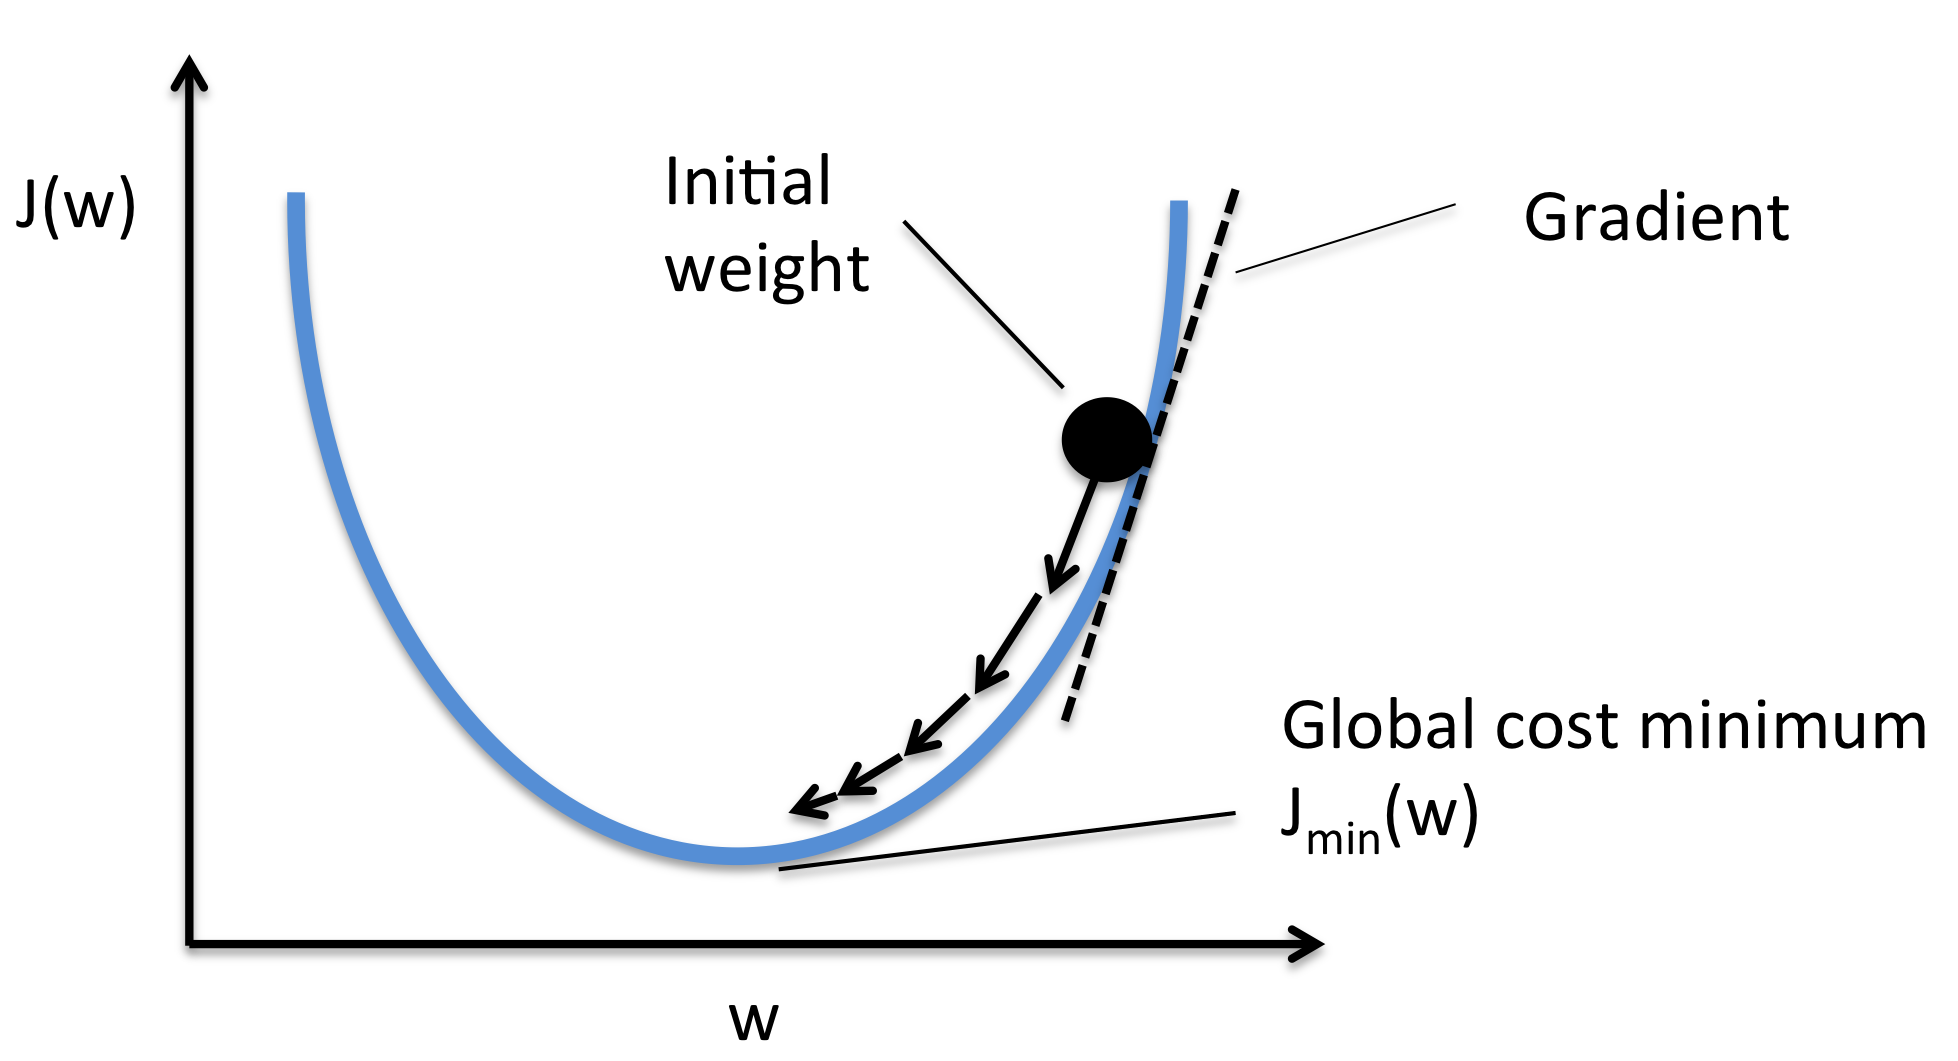

font:<br/>
https://medium.com/@rumankhan1/understanding-optimization-in-ml-with-gradient-descent-implement-sgd-regressor-from-scratch-4e11dac74c9<br/>
https://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization/

## <span style='color:blue'> Regularization </span>

IBM exercise resorces:
* Implement data standardization<br/>
**Standardizing** data refers to transforming each variable so that it more closely follows a **standard** normal distribution, with mean 0 and standard deviation 1. The [`StandardScaler`](http://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) == normalization

* Implement variants of regularized regression
* Combine data standardization with the train-test split procedure
* Implement regularization to prevent overfitting in regression problems

```python
dict(zip(df.columns.values, model.coef_))
```
###### The higher the alpha/lambda the higher the bias the lower the variance - overfitting.

In [154]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

In [155]:
# Polynomial Features

# We use `include_bias=False` since `Lasso` includes a bias by default.
pf = PolynomialFeatures(degree=2, include_bias=False) 
X_pf = pf.fit_transform(X)

In [156]:
# Standarization
X_pf_ss = s.fit_transform(X_pf)

In [157]:
#standard alpha is 1.0, the higher the alpha the more the regularization the simpler the model;
las = Lasso()
las.fit(X_pf_ss, y)
# las.coef_

Lasso()

In [161]:
las001 = Lasso(alpha=0.01)
las001.fit(X_pf_ss, y)
print('sum of coefficients:', abs(las001.coef_).sum() )
print('number of coefficients not equal to 0:', (las001.coef_!=0).sum())

sum of coefficients: 1097.9337177183327
number of coefficients not equal to 0: 171


In [162]:
las1 = Lasso(alpha=1)
las1.fit(X_pf_ss, y)
print('sum of coefficients:', abs(las1.coef_).sum() )
print('number of coefficients not equal to 0:', (las1.coef_!=0).sum())

sum of coefficients: 271.40270947722564
number of coefficients not equal to 0: 4


#### <span style='color:blue'> Comment: </span>

With more regularization (higher alpha) we will expect the penalty for higher weights to be greater and thus the coefficients to be pushed down. Thus a higher alpha means lower magnitude with more coefficients pushed down to 0.

In [163]:
y.shape

(494,)

In [164]:
# Score

from sklearn.metrics import r2_score
r2_score(y, las.predict(X_pf_ss))

0.9999818613991752

Here we see that the result of Polynomial Features, with StandardScalar and Lasso Regression surpass the score of r2_score in comparison with Linear normal Regression.

### With Split train/test

In [165]:
s

StandardScaler()

In [166]:
X_train_s = s.fit_transform(X_train)
las.fit(X_train_s, y_train)
X_test_s= s.transform(X_test)
y_pred = las.predict(X_test_s)
r2_score(y_pred, y_test)

0.9999830841883803

In [167]:
X_train_s = s.fit_transform(X_train)
las001.fit(X_train_s, y_train)
X_test_s= s.transform(X_test)
y_pred = las.predict(X_test_s)
r2_score(y_pred, y_test)

0.9999830841883803

In [168]:
print('Magnitude of Lasso coefficients:', abs(las001.coef_).sum())
print('Number of coeffients not equal to 0 for Lasso:', (las001.coef_!=0).sum())

print('Magnitude of Linear Regression coefficients:', abs(lr.coef_).sum())
print('Number of coeffients not equal to 0 for Linear Regression:', (lr.coef_!=0).sum())

Magnitude of Lasso coefficients: 270.4127586797162
Number of coeffients not equal to 0 for Lasso: 8
Magnitude of Linear Regression coefficients: 263.2634579814435
Number of coeffients not equal to 0 for Linear Regression: 17


## <span style='color:green'> Conclusion</span>

Lasso has a tendency to take some coefficients to zero as we can see above.

### L1 vs. L2 Regularization, LASSO vs RIDGE

In [169]:
from sklearn.linear_model import Ridge

In [170]:
r = Ridge(alpha = 0.01)
X_train_s = s.fit_transform(X_train)
r = r.fit(X_train, y_train)
X_test_s = s.transform(X_test)
y_pred_r = r.predict(X_test_s)

In [171]:
print(np.sum(np.abs(r.coef_)))
print(np.sum(np.abs(las001.coef_)))

print(np.sum(r.coef_ != 0))
print(np.sum(las001.coef_ != 0))

3.000000506658293
270.4127586797162
17
8


## <span style='color:green'> Conclusion</span>

Once again, we see that Lasso has a tendency to take some coefficients to zero even when compared to the Rigde regression, which is faster and less costly in terms of processing time.

In [172]:
y_pred = r.predict(X_test_s)
print(r2_score(y_test, y_pred_r))

y_pred = las001.predict(X_test_s)
print(r2_score(y_test, y_pred))

-0.4604561946935146
0.9999995057617186


## <span style='color:green'> Final conclusion</span>

The Lasso model again seems to be the best choice for this particular example. It has a better r2_score than any other model, especially if we apply polynomial features, StandardScalar and the cross-validation technique to find the best parameters (alpha / lambda), including as we looked above.

We used a well-organized dataset, which already provided only one categorical feature that made it easy to apply OneHotEncode without adding too many columns. We had the chance to detect many outliers, many correlations and we found that the data was not normalized with a super small p-value when we applied a normality test to it. We went from Exploratory Data Analysis to Feature Engineering, to Univariate and Multivariate Analysis, to the application of Linear Regression, Lasso Regression, Rigde Regression and even SGDRegressor that taught us all about the concept of Gradient Descending - minimizing the function of cost of our model.<br/>

We undersood that our data had many positive correlations and that our predictions had very high scores. The best model for this example, again, was Lasso using hyperparameter adjustments and standardization of our data.

As a suggestion for a next application, it would be to try different models and even a different set of the same data trying to find a more realistic application.

I really believe that some models are overfitting just because the scores were too high.